#### Ensemble Classification Models 
Each model below creates a distinct classifier for each class, in order to distinguish that class from all other classes in predictions. The underlying classification system is the only difference between these models: KDE, Decision Trees, or Neural Nets.

In [1]:
from datetime import datetime
import time
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from models.ensemble_models.ktrees_model.ktrees_model import KTreesModel
from models.ensemble_models.mc_kde_model.mc_kde_model import MCKDEModel
# from models.ensemble_models.network_model.network_model import Network

filtered_cols = ['z_mag', 'z_err', 'z_snr', 'z_wts', 'r_mag', 'r_err', 'r_snr', 'r_wts',
                 'g_mag', 'g_err', 'g_snr', 'g_wts', 'W1_mag', 'W1_err', 'W1_snr', 'W1_wts',
                 'i_mag', 'i_err', 'i_snr', 'i_wts', 'W2_mag', 'W2_err', 'W2_snr', 'W2_wts',
                 'y_mag', 'y_err', 'y_snr', 'y_wts',
                'FUV_pts', 'FUV_src' , 'FUV_cal', 'NUV_pts' , 'NUV_src', 'NUV_cal']


def run_and_log_time(model):
    """
    Runs instantiated model, and outputs time taken.
    """
    start_time = datetime.now() # for recording run-time
    
    model.run_model()
    
    end_time = datetime.now()
    mins = int(time.mktime(end_time.timetuple()) -
               time.mktime(start_time.timetuple())) / 60
    print(model.name + " took " + str(round(mins,2)) + " minutes to run ")
    



Constructing Class Hierarchy Tree...

Data Filters
------------------
cols : ['z_mag', 'z_err', 'z_snr', 'z_wts', 'r_mag', 'r_err', 'r_snr', 'r_wts', 'g_mag', 'g_err', 'g_snr', 'g_wts', 'W1_mag', 'W1_err', 'W1_snr', 'W1_wts', 'i_mag', 'i_err', 'i_snr', 'i_wts', 'W2_mag', 'W2_err', 'W2_snr', 'W2_wts', 'y_mag', 'y_err', 'y_snr', 'y_wts', 'FUV_pts', 'FUV_src', 'FUV_cal', 'NUV_pts', 'NUV_src', 'NUV_cal']
col_matches : None
num_runs : 3
test_on_train : False
folds : 3
data_split : 0.3
top_classes : None
one_all : None
subsample : 10
transform_features : False
transform_labels : False
incl_redshift : True
min_class_size : 9
pca : None
scale : True
prior : uniform
class_labels : ['Ia', 'Ia-91bg', 'CC']

Features
------------------
Total: 34
y_err, z_snr, W1_wts, i_err, i_mag, NUV_cal, FUV_pts, r_wts, W2_wts, y_mag, z_err, NUV_src, W2_snr, i_snr, y_snr, FUV_src, r_snr, W1_snr, r_err, z_wts, z_mag, W2_mag, W2_err, g_mag, W1_err, i_wts, g_snr, g_wts, W1_mag, r_mag, y_wts, FUV_cal, g_err, NUV_p

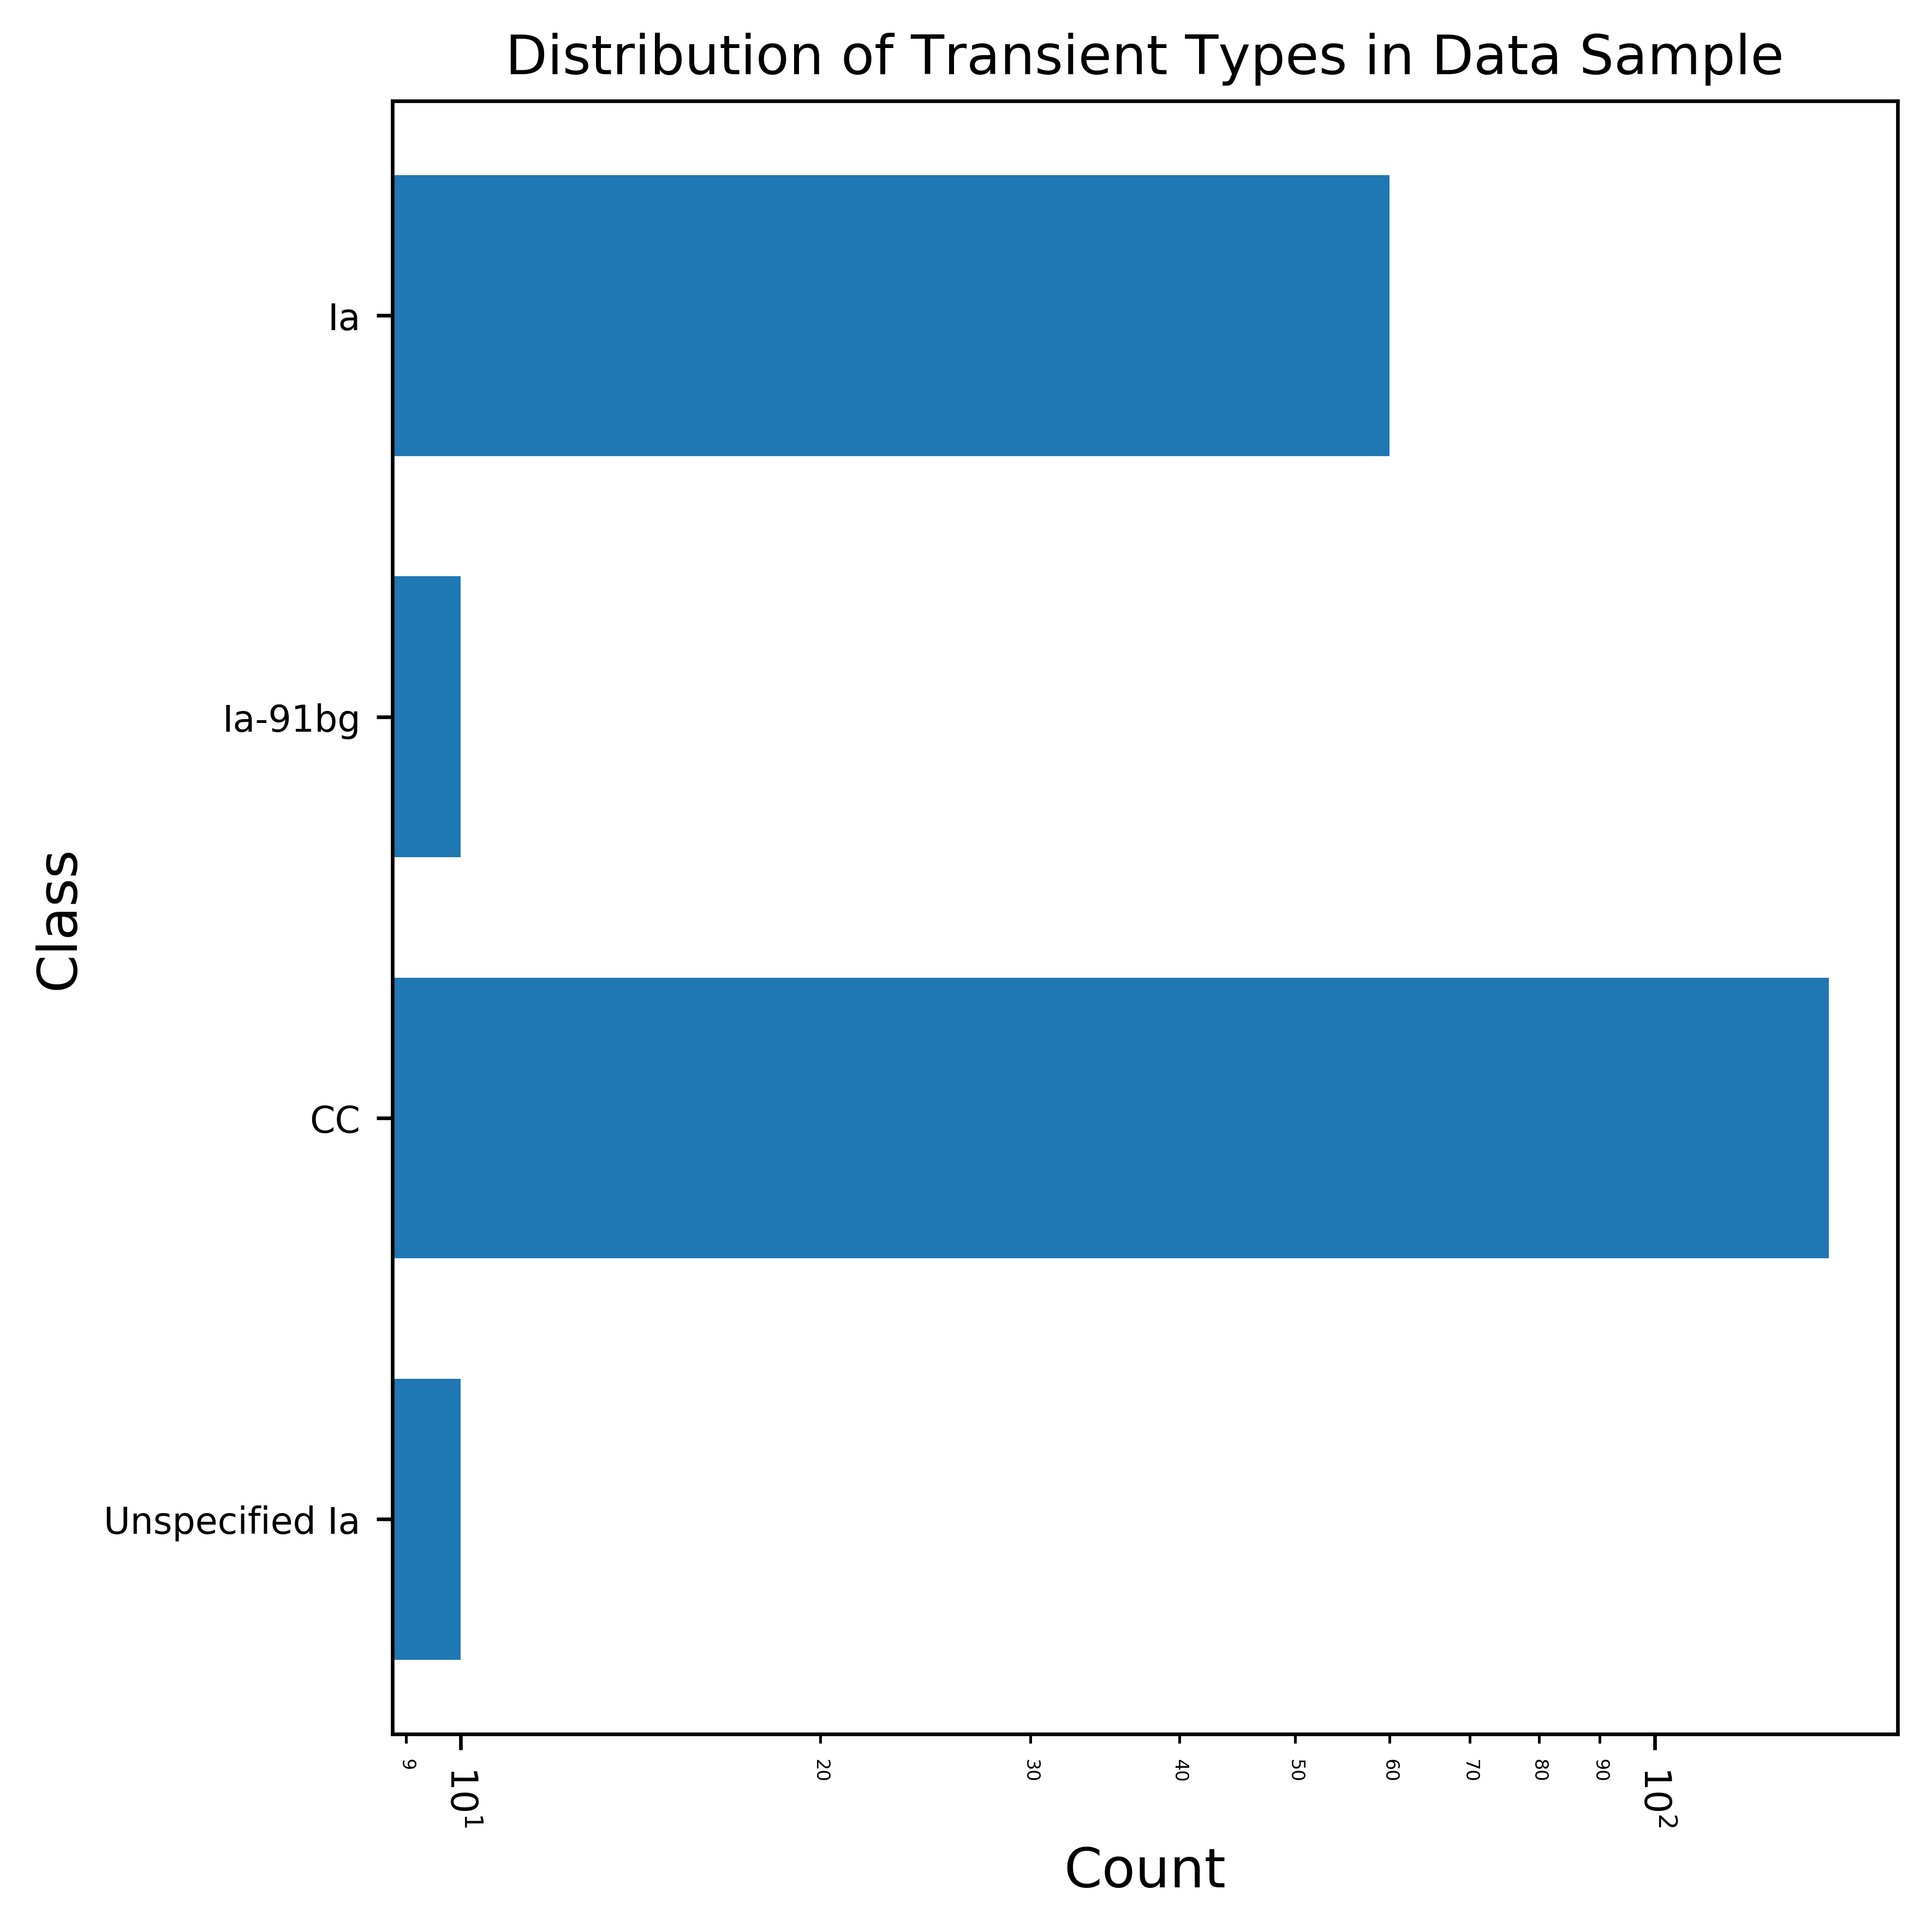

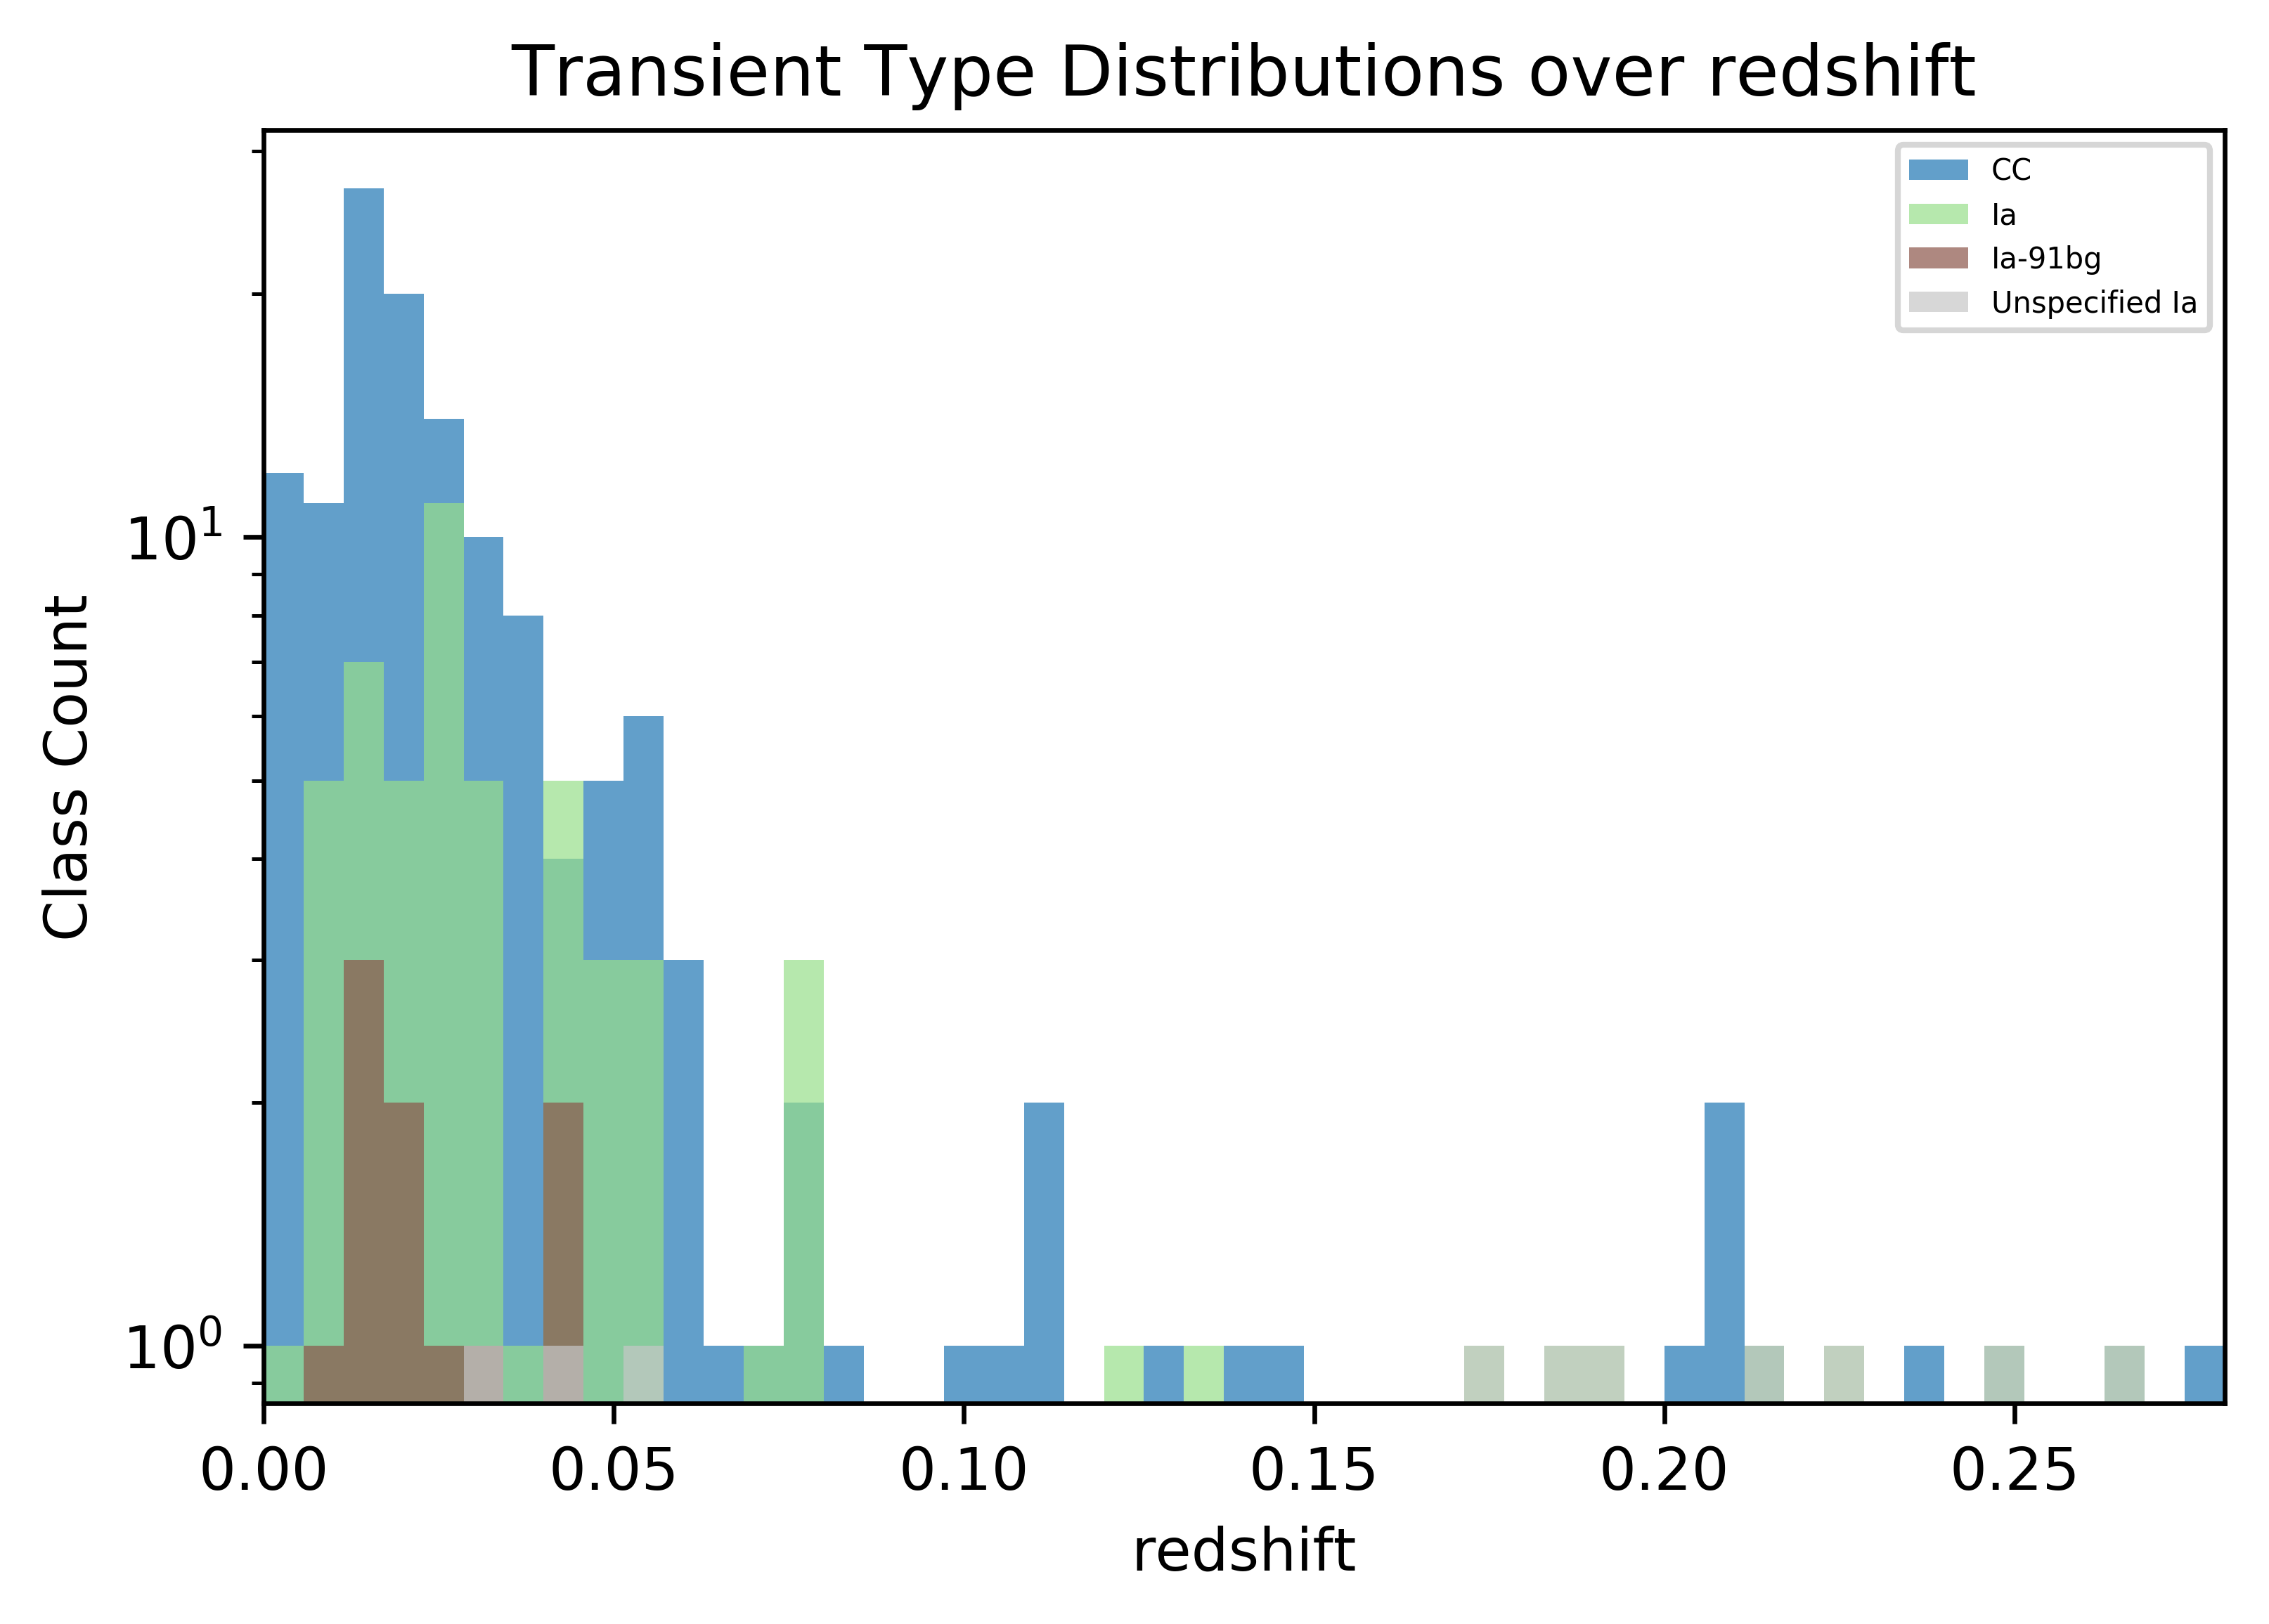



Run 1

Class Model: Ia

Class Model: Ia-91bg

Class Model: CC

Class Model: Unspecified Ia
EnsembleModel get_class_probabilities NULL probability for Ia
EnsembleModel get_class_probabilities NULL probability for Ia-91bg
EnsembleModel get_class_probabilities NULL probability for CC
EnsembleModel get_class_probabilities NULL probability for Unspecified Ia
EnsembleModel get_class_probabilities NULL probability for Ia
EnsembleModel get_class_probabilities NULL probability for Ia-91bg
EnsembleModel get_class_probabilities NULL probability for CC
EnsembleModel get_class_probabilities NULL probability for Unspecified Ia
EnsembleModel get_class_probabilities NULL probability for Ia
EnsembleModel get_class_probabilities NULL probability for Ia-91bg
EnsembleModel get_class_probabilities NULL probability for CC
EnsembleModel get_class_probabilities NULL probability for Unspecified Ia
EnsembleModel get_class_probabilities NULL probability for Ia
EnsembleModel get_class_probabilities NULL probabi


Class Model: Ia-91bg

Class Model: CC

Class Model: Unspecified Ia


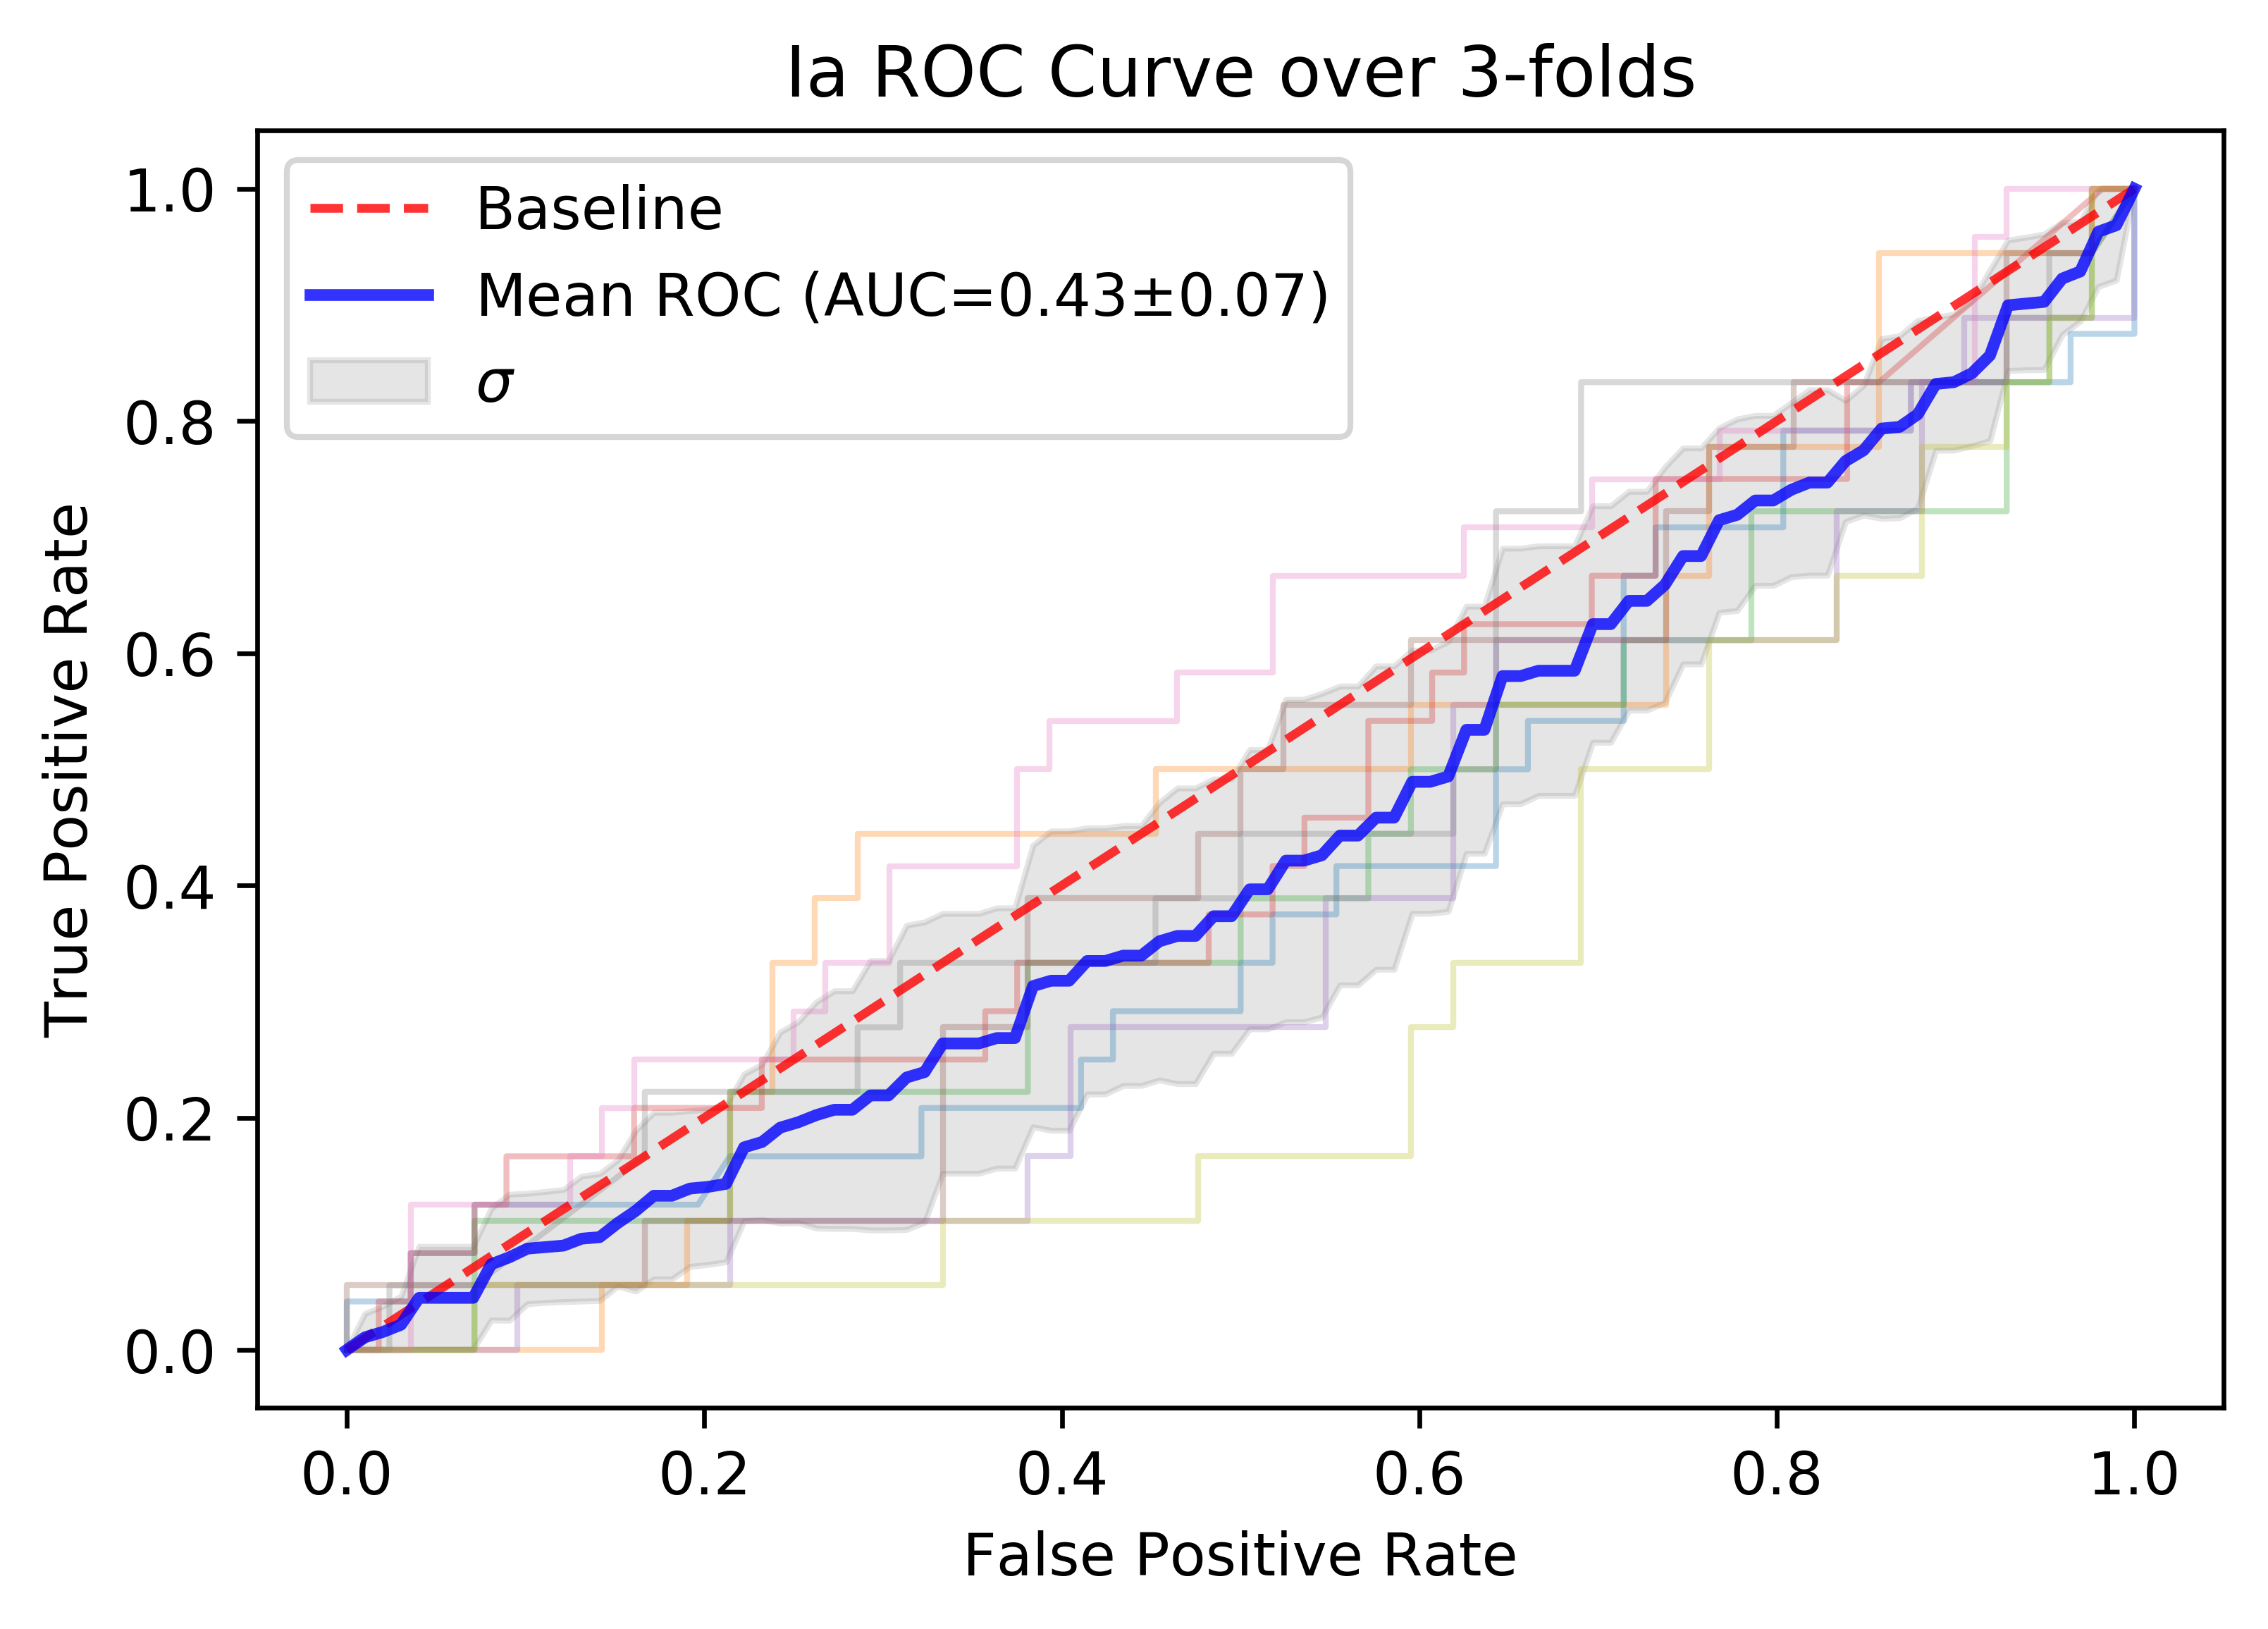

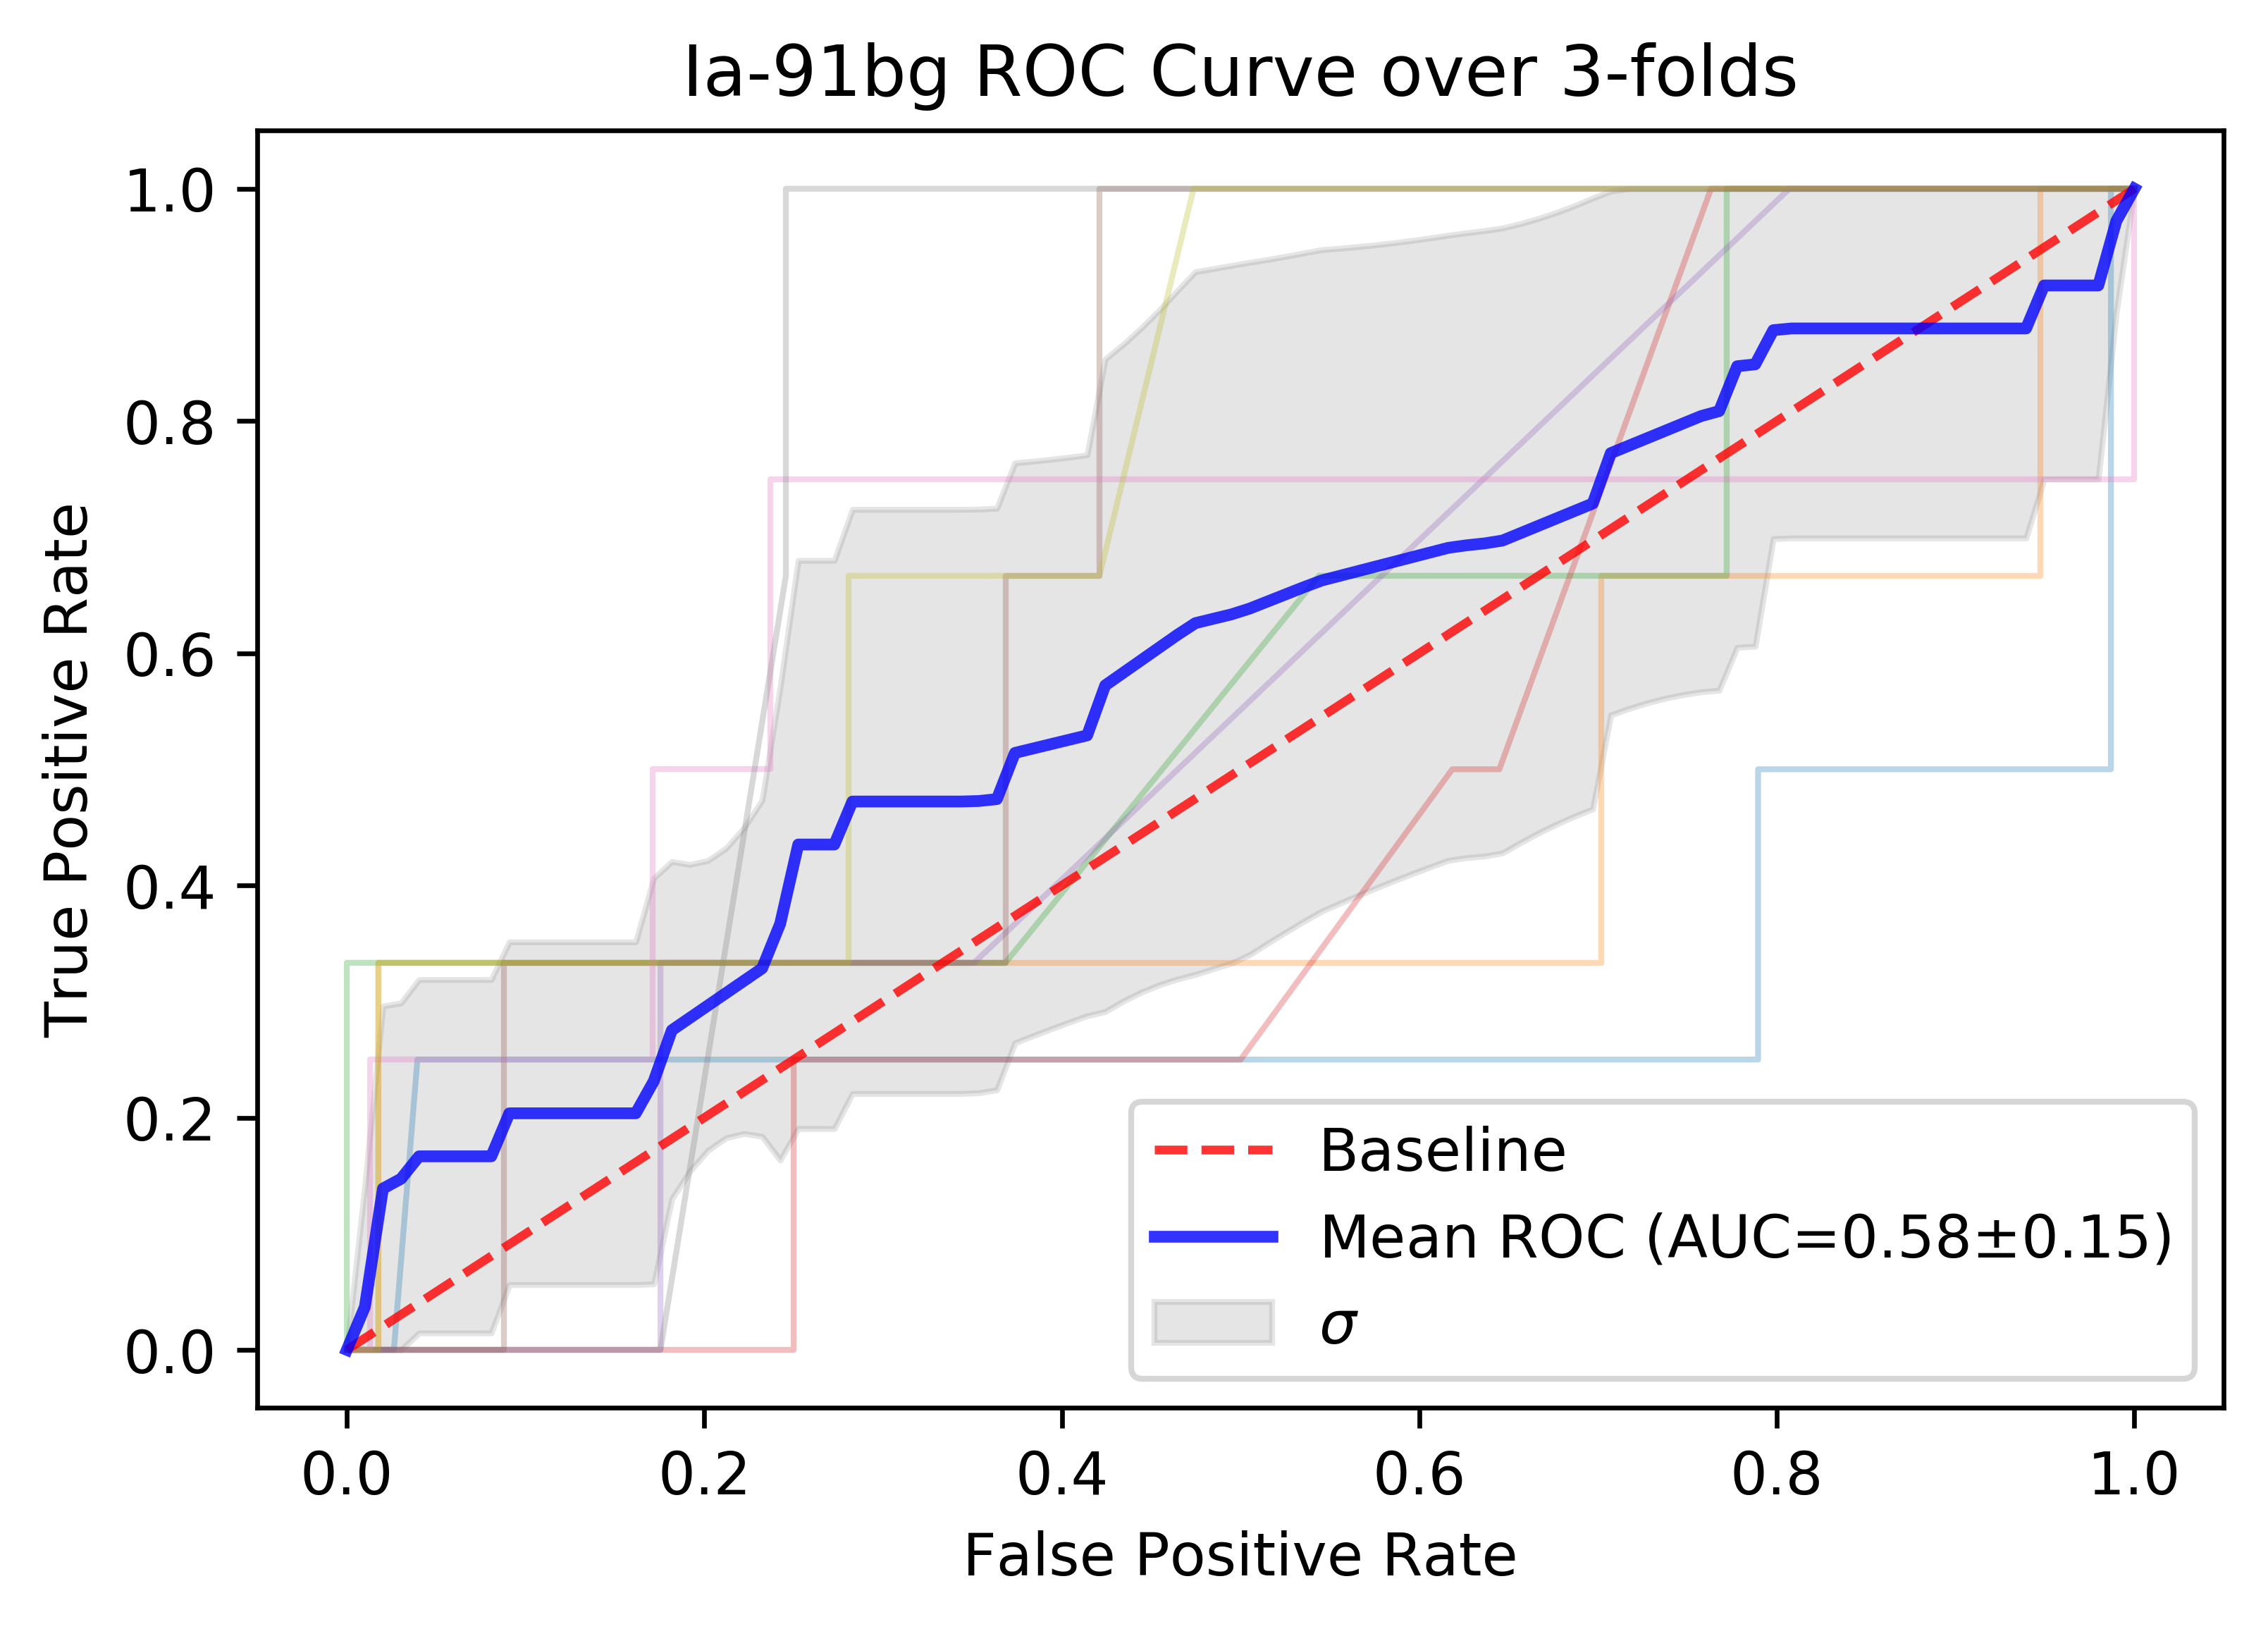

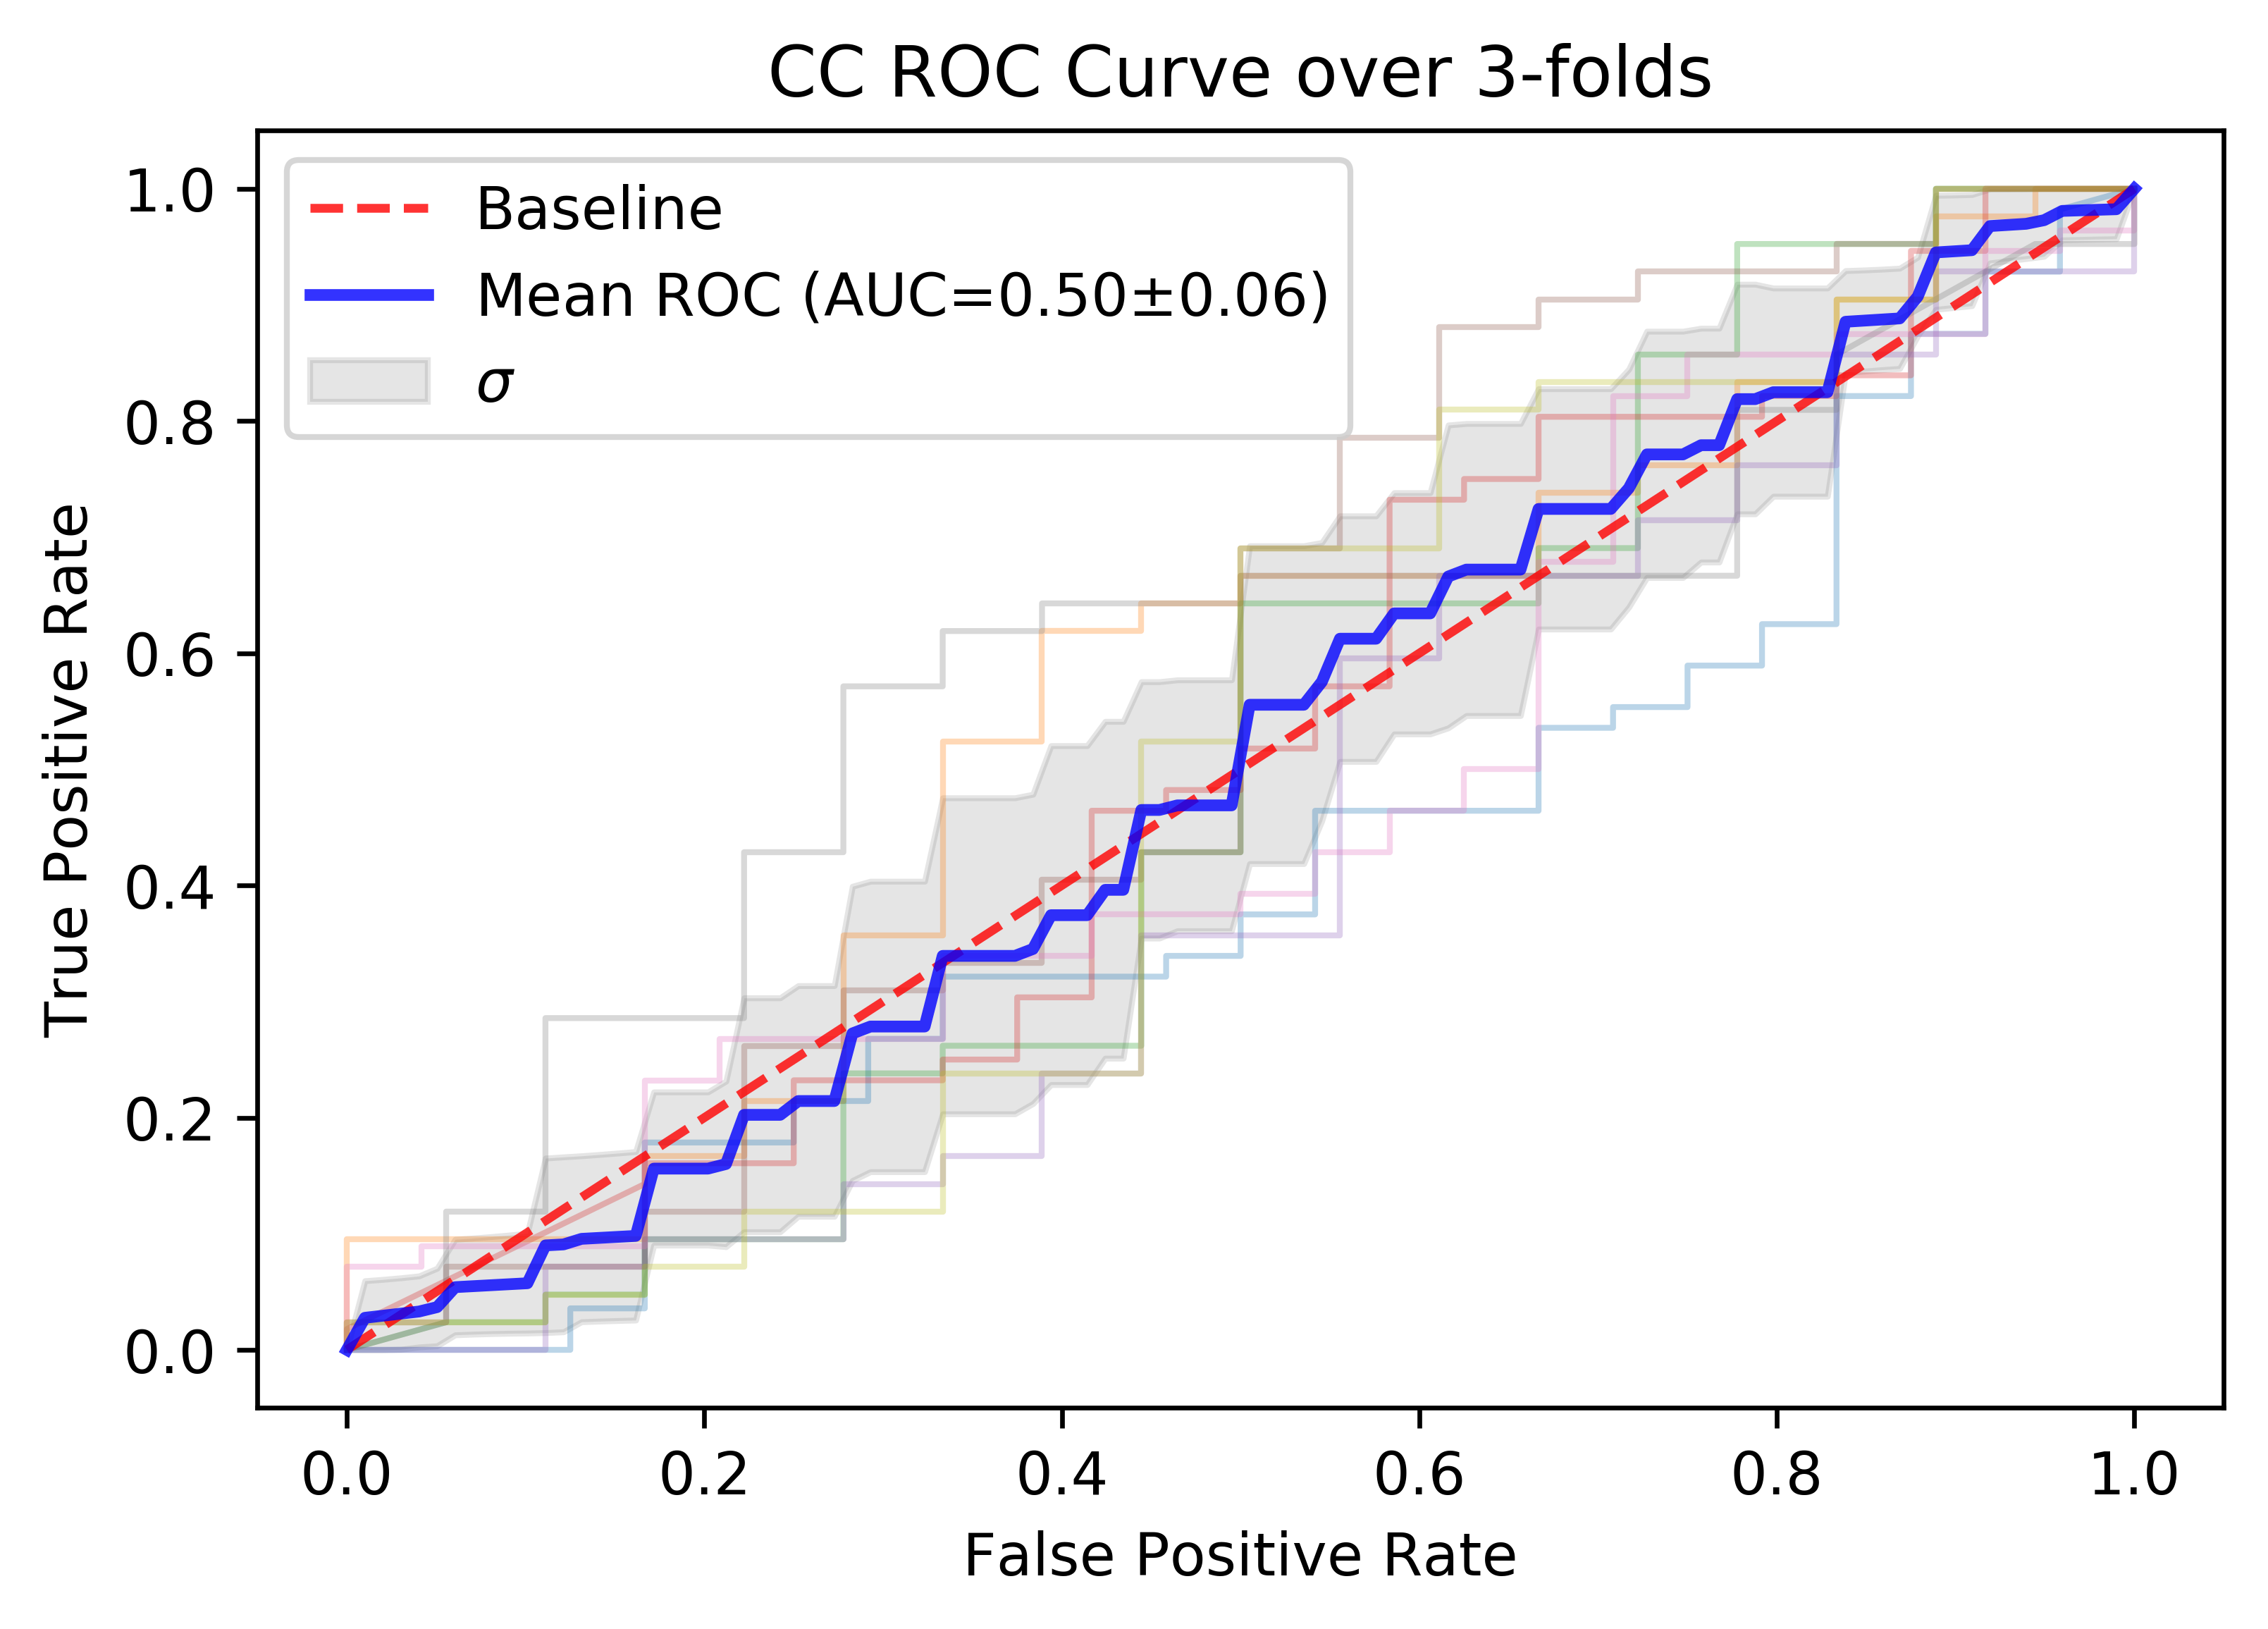

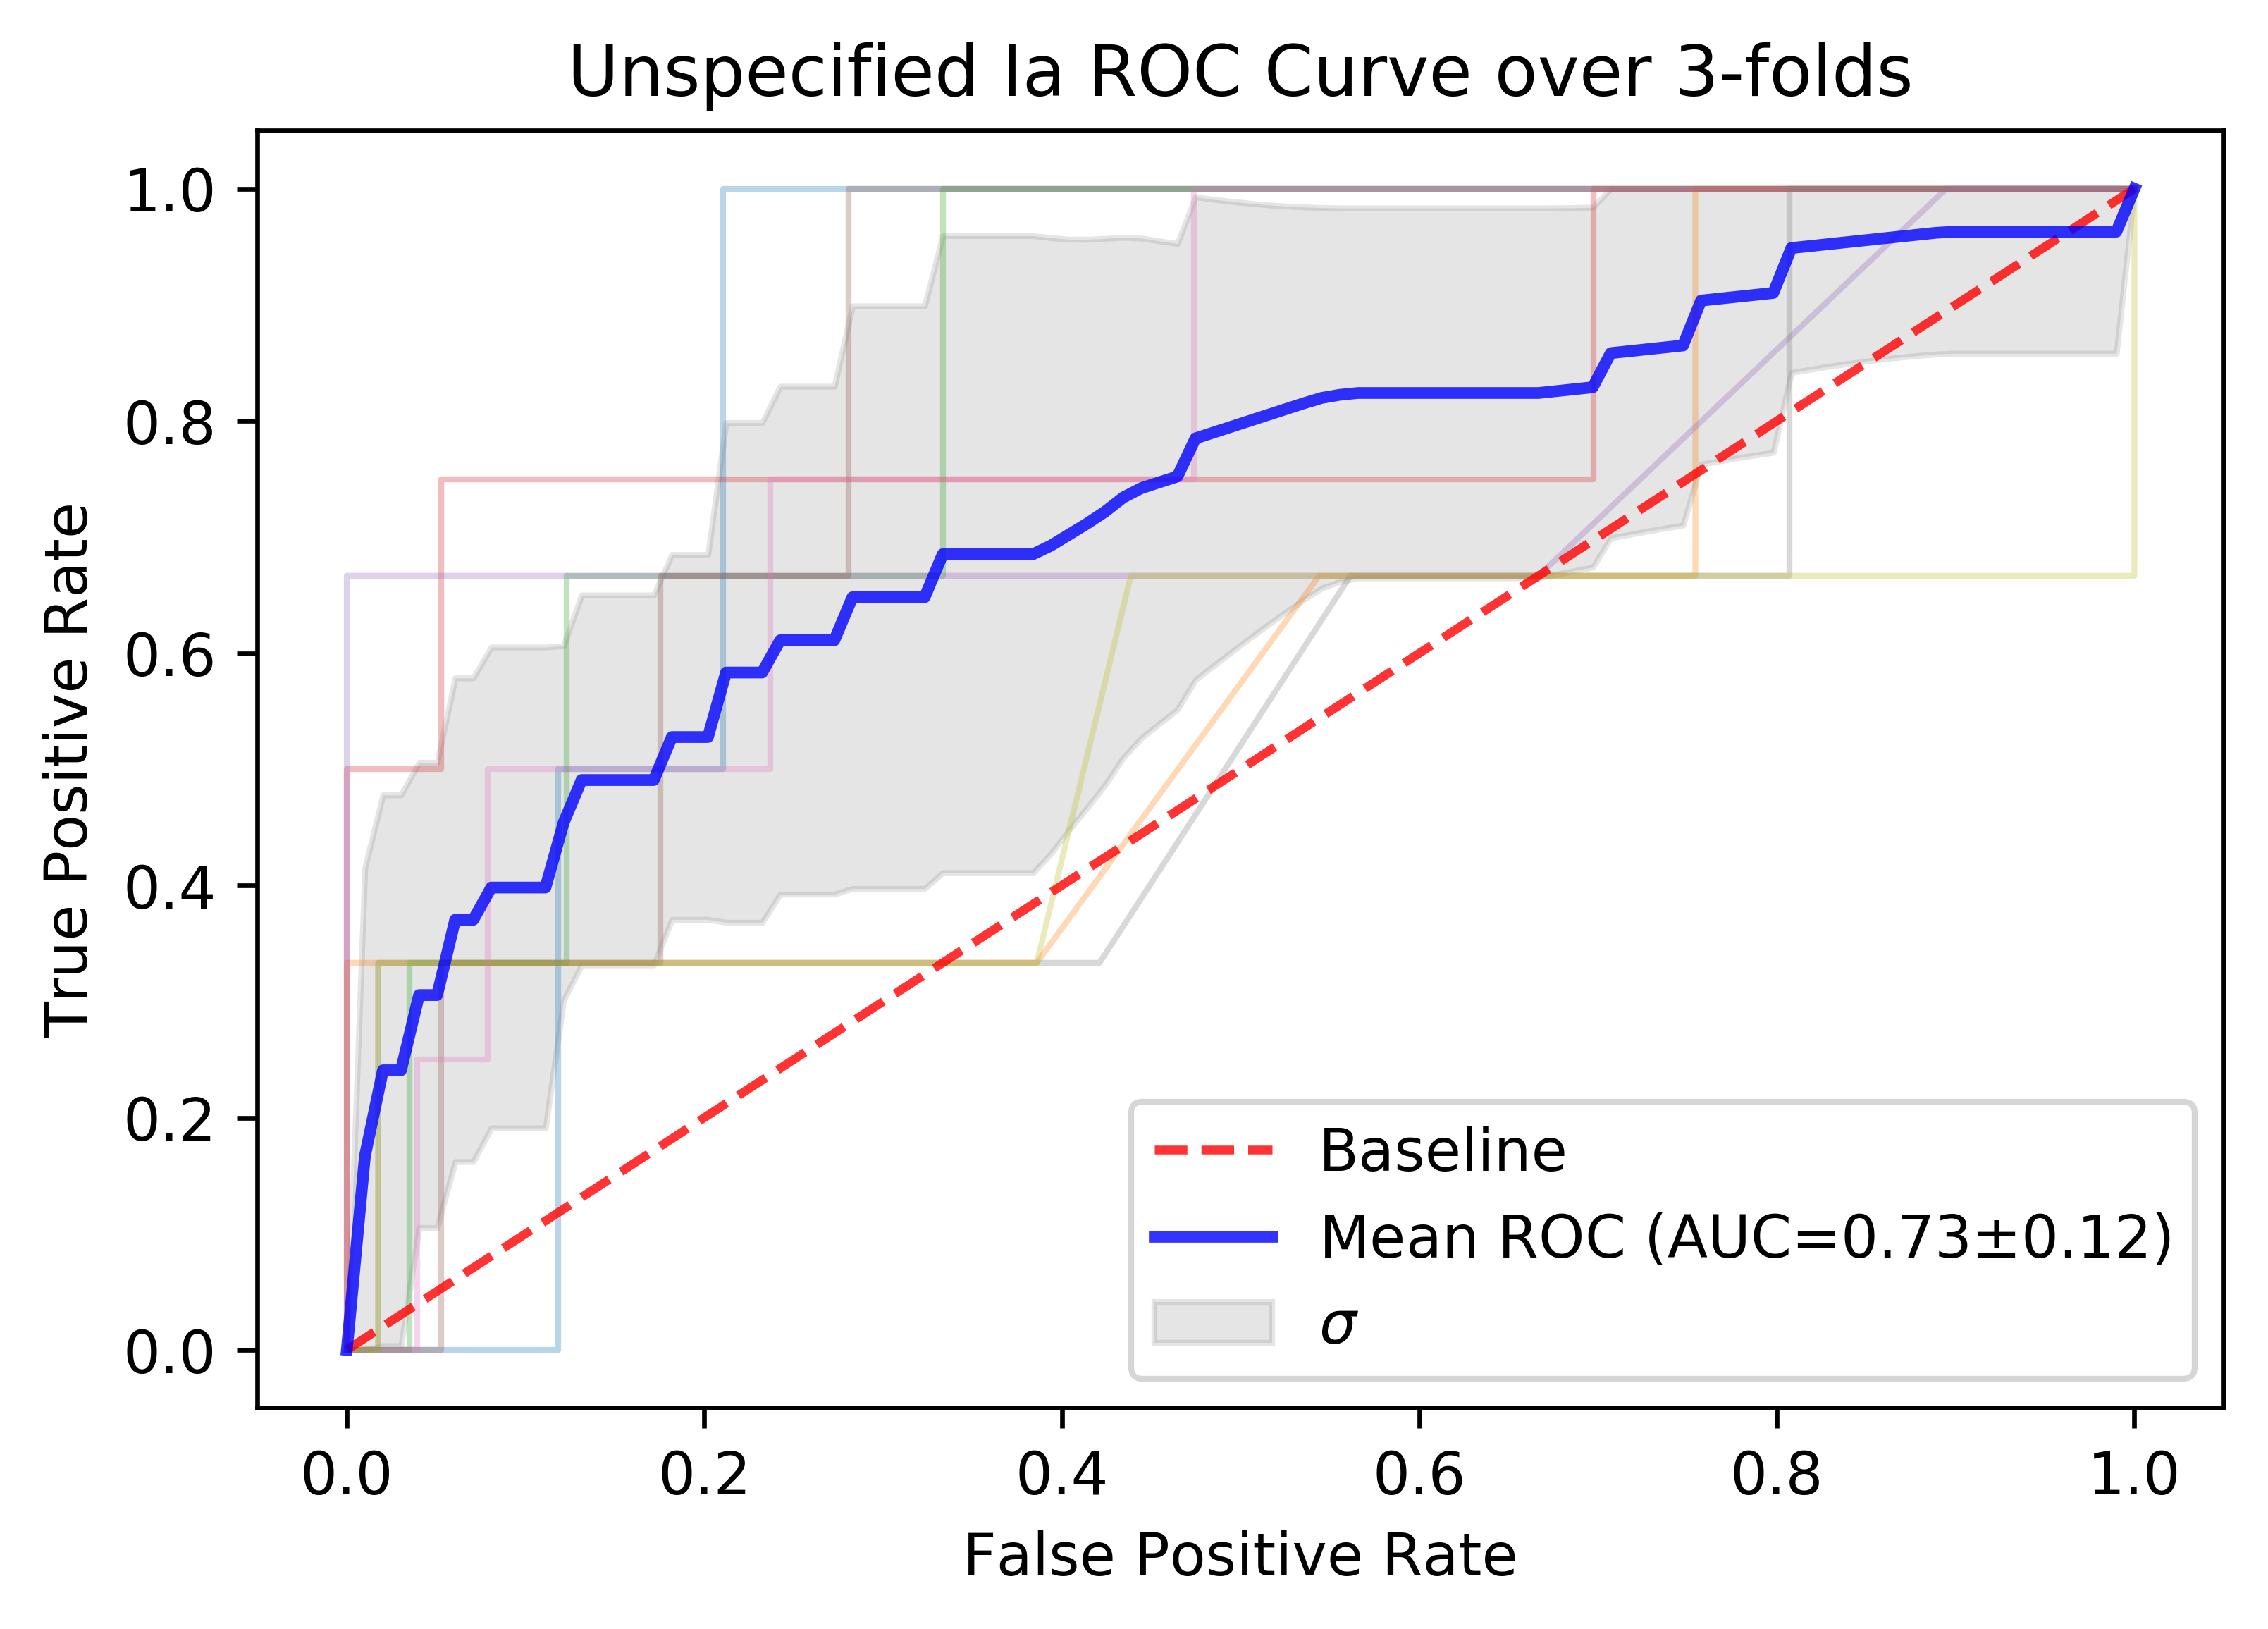

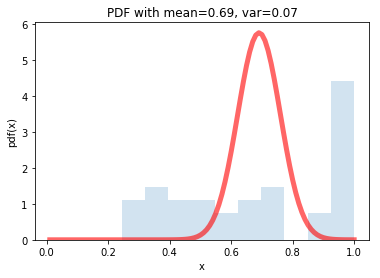

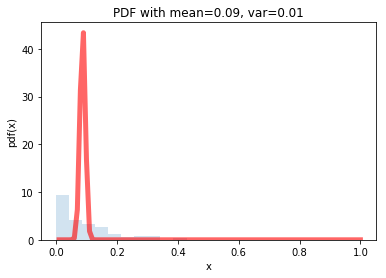

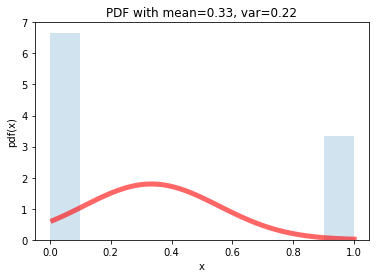

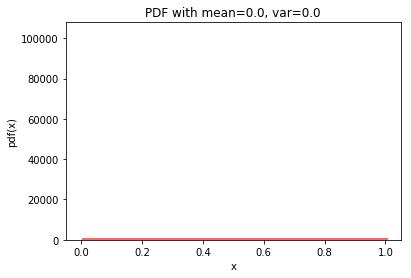

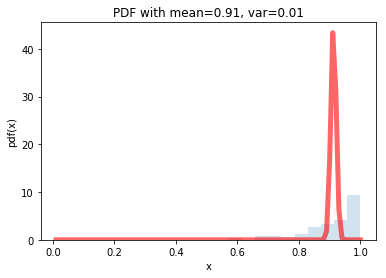

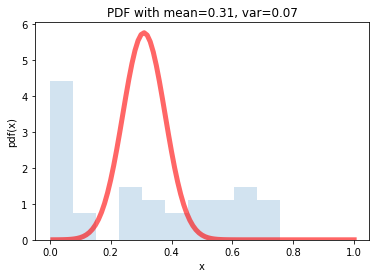

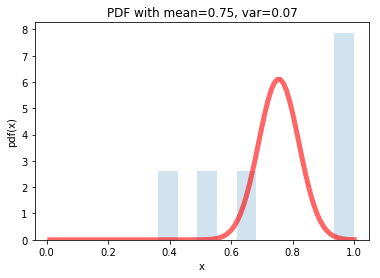

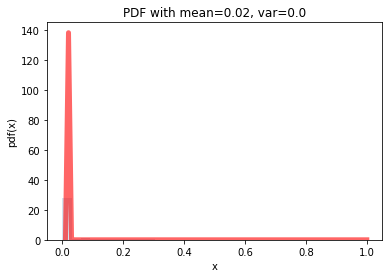

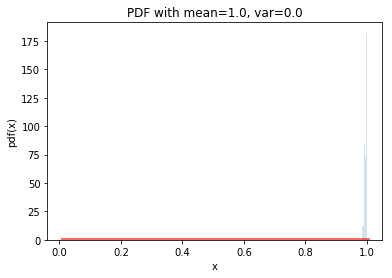

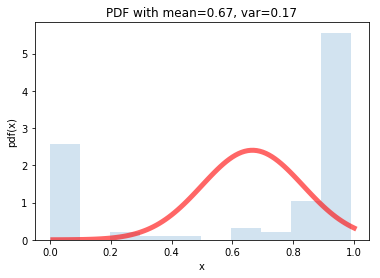

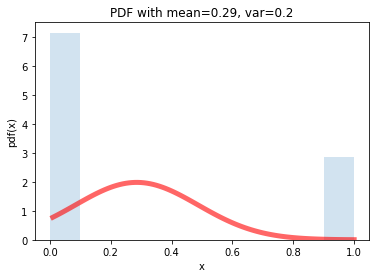

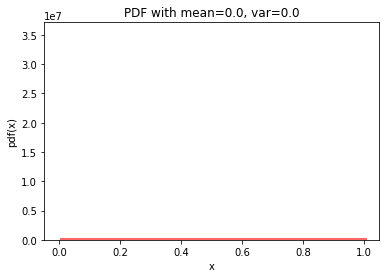

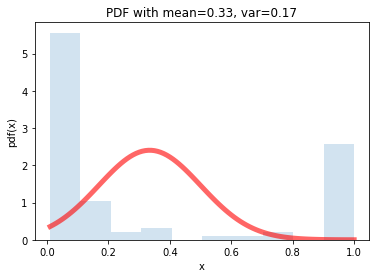

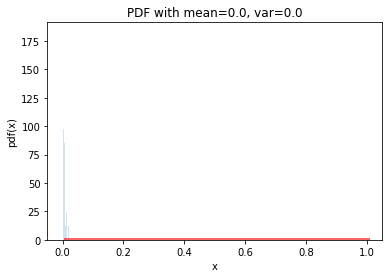

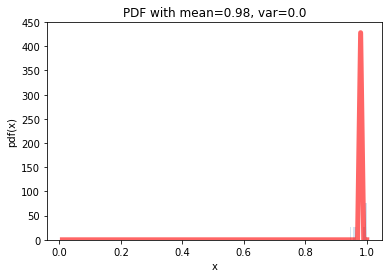

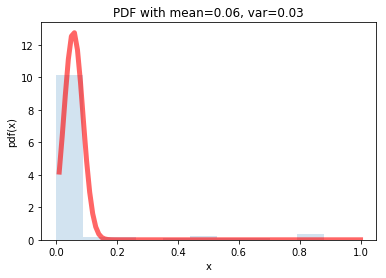

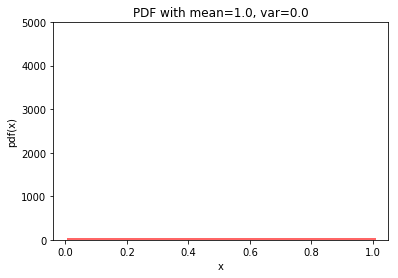

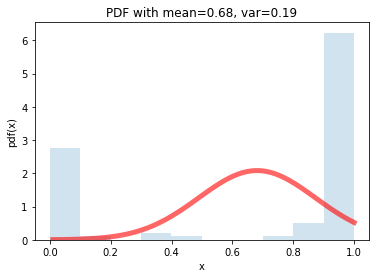

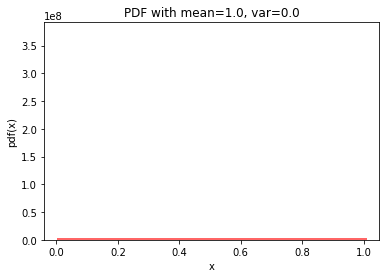

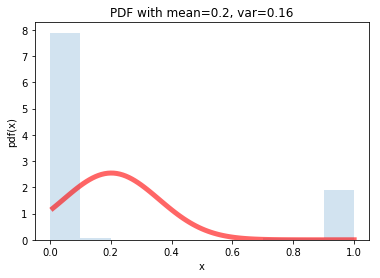

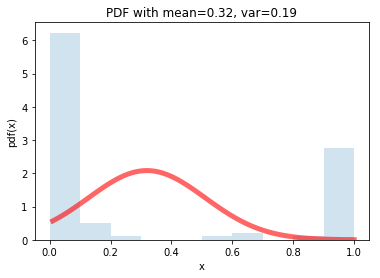

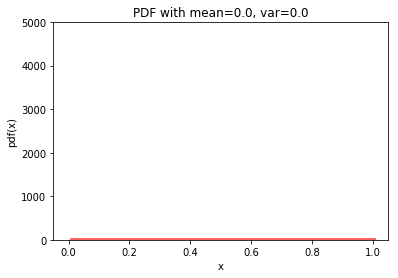

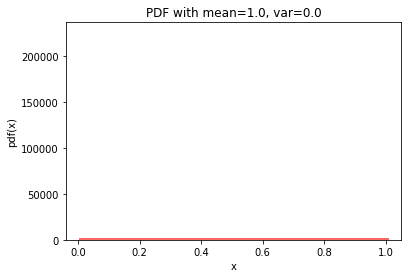

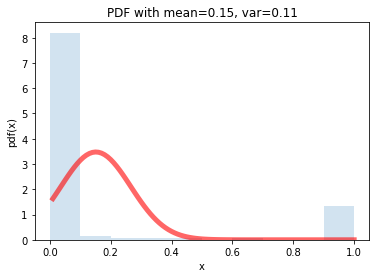

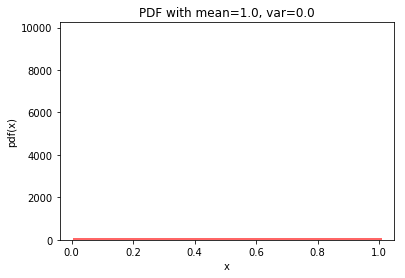

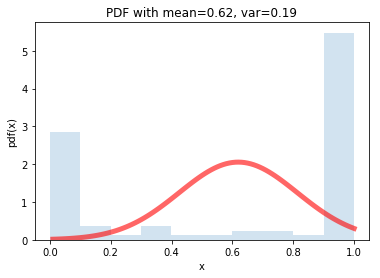

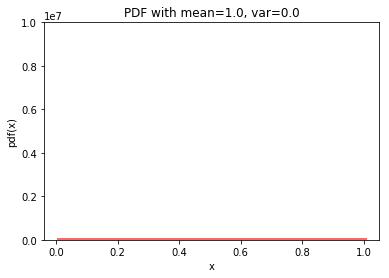

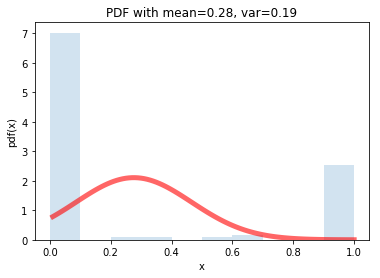

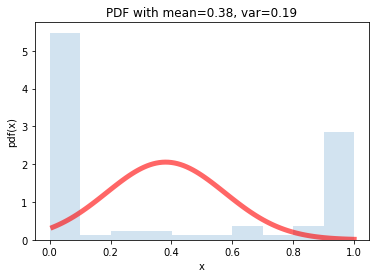

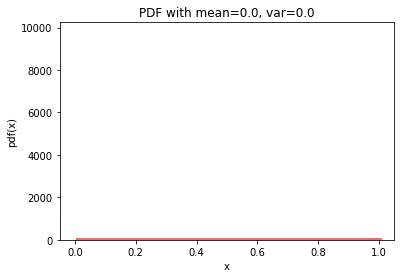

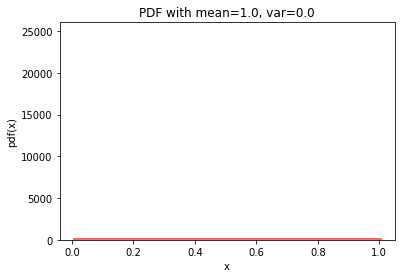

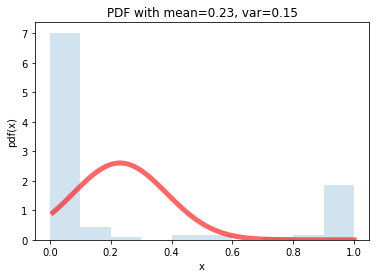

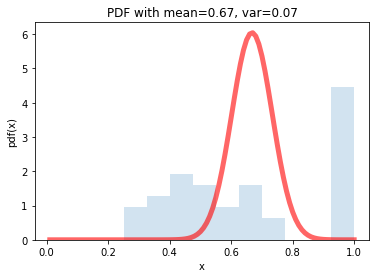

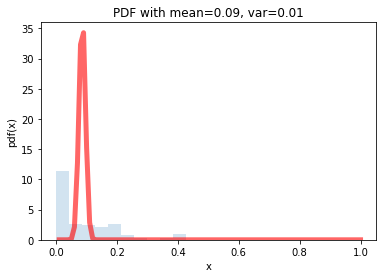

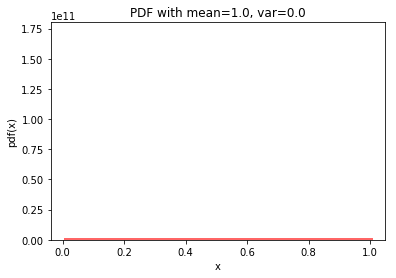

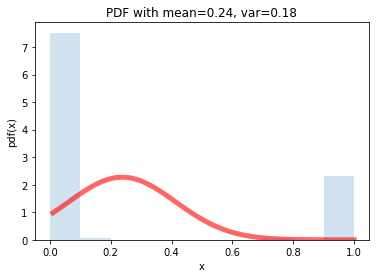

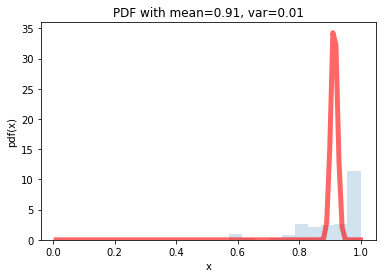

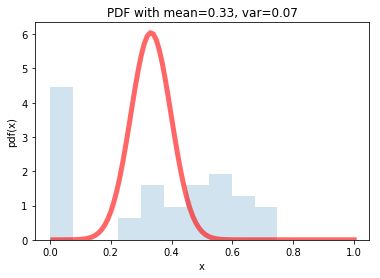

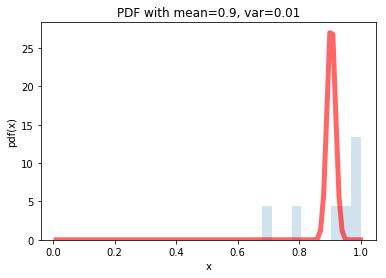

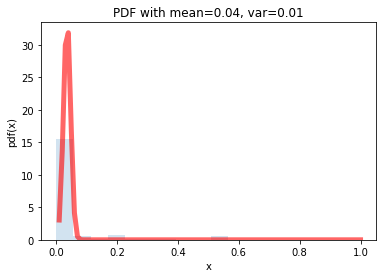

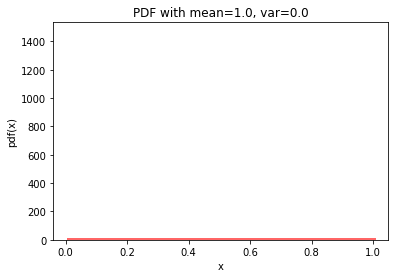

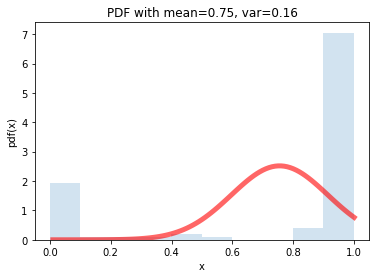

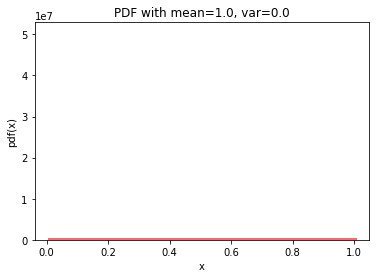

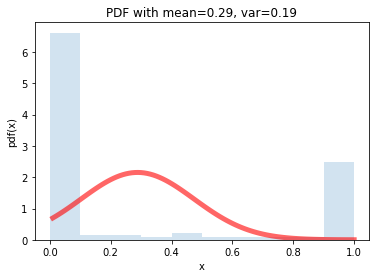

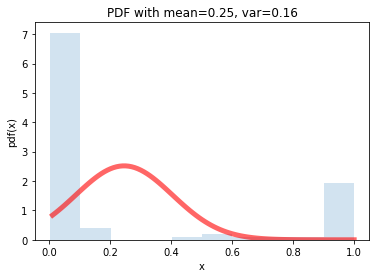

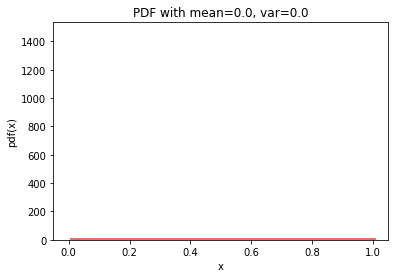

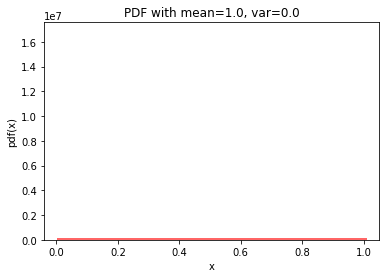

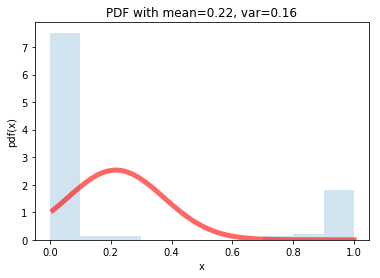

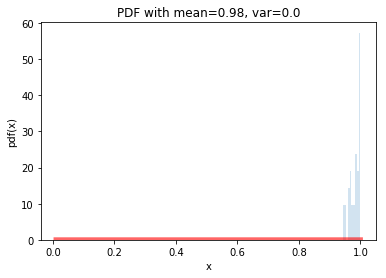

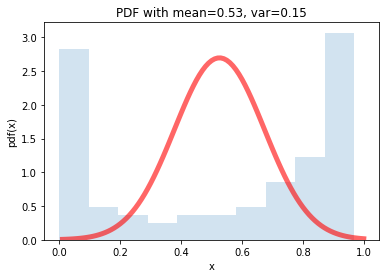

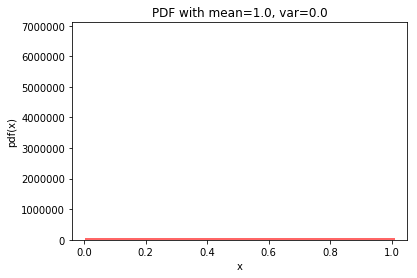

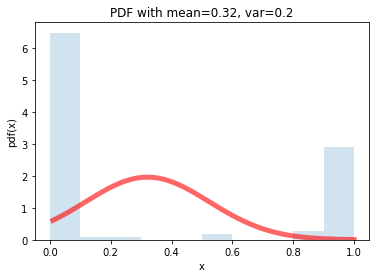

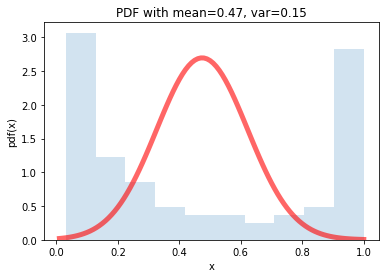

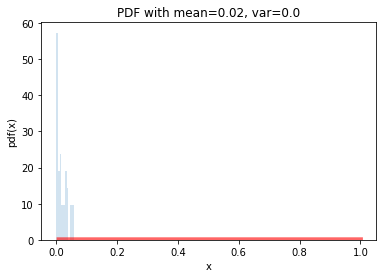

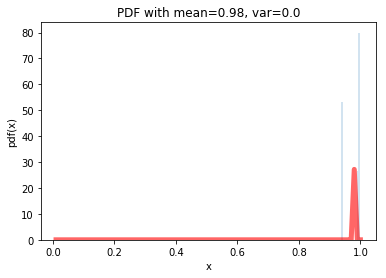

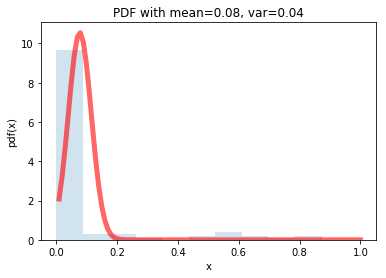

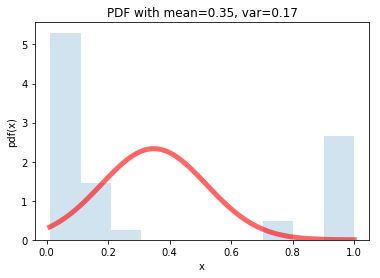

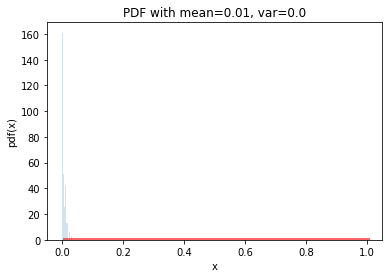

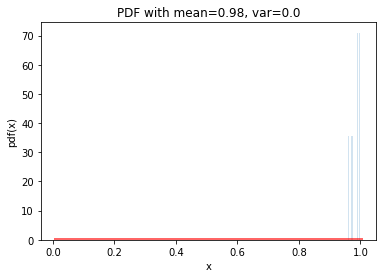

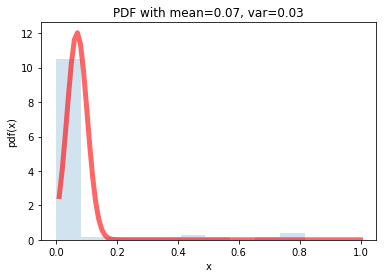

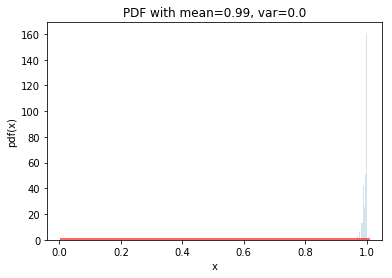

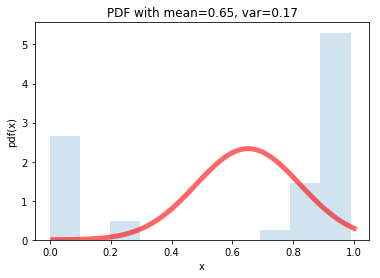

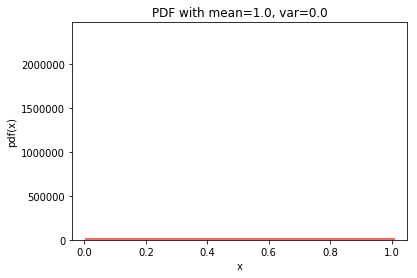

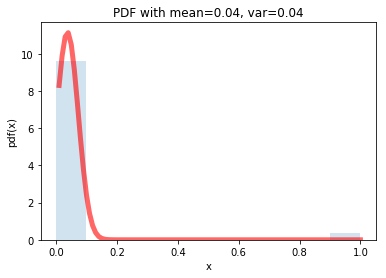

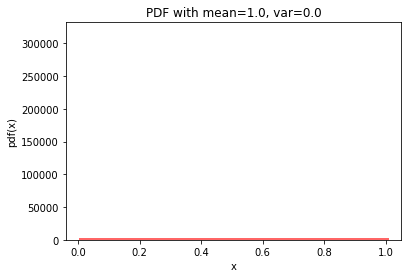

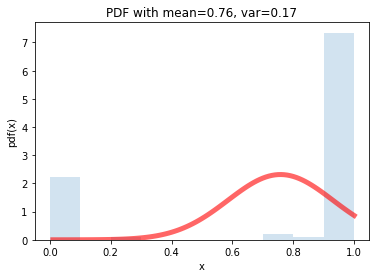

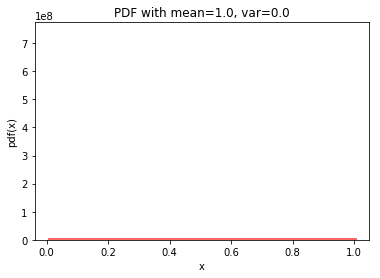

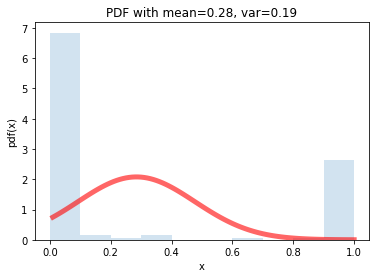

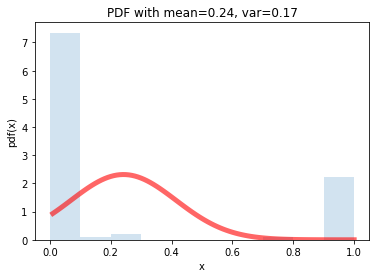

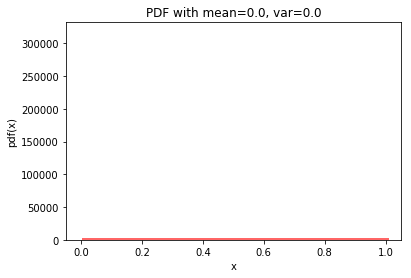

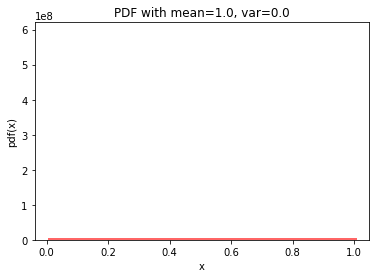

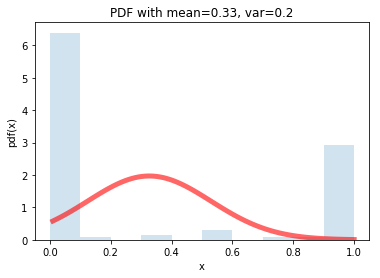

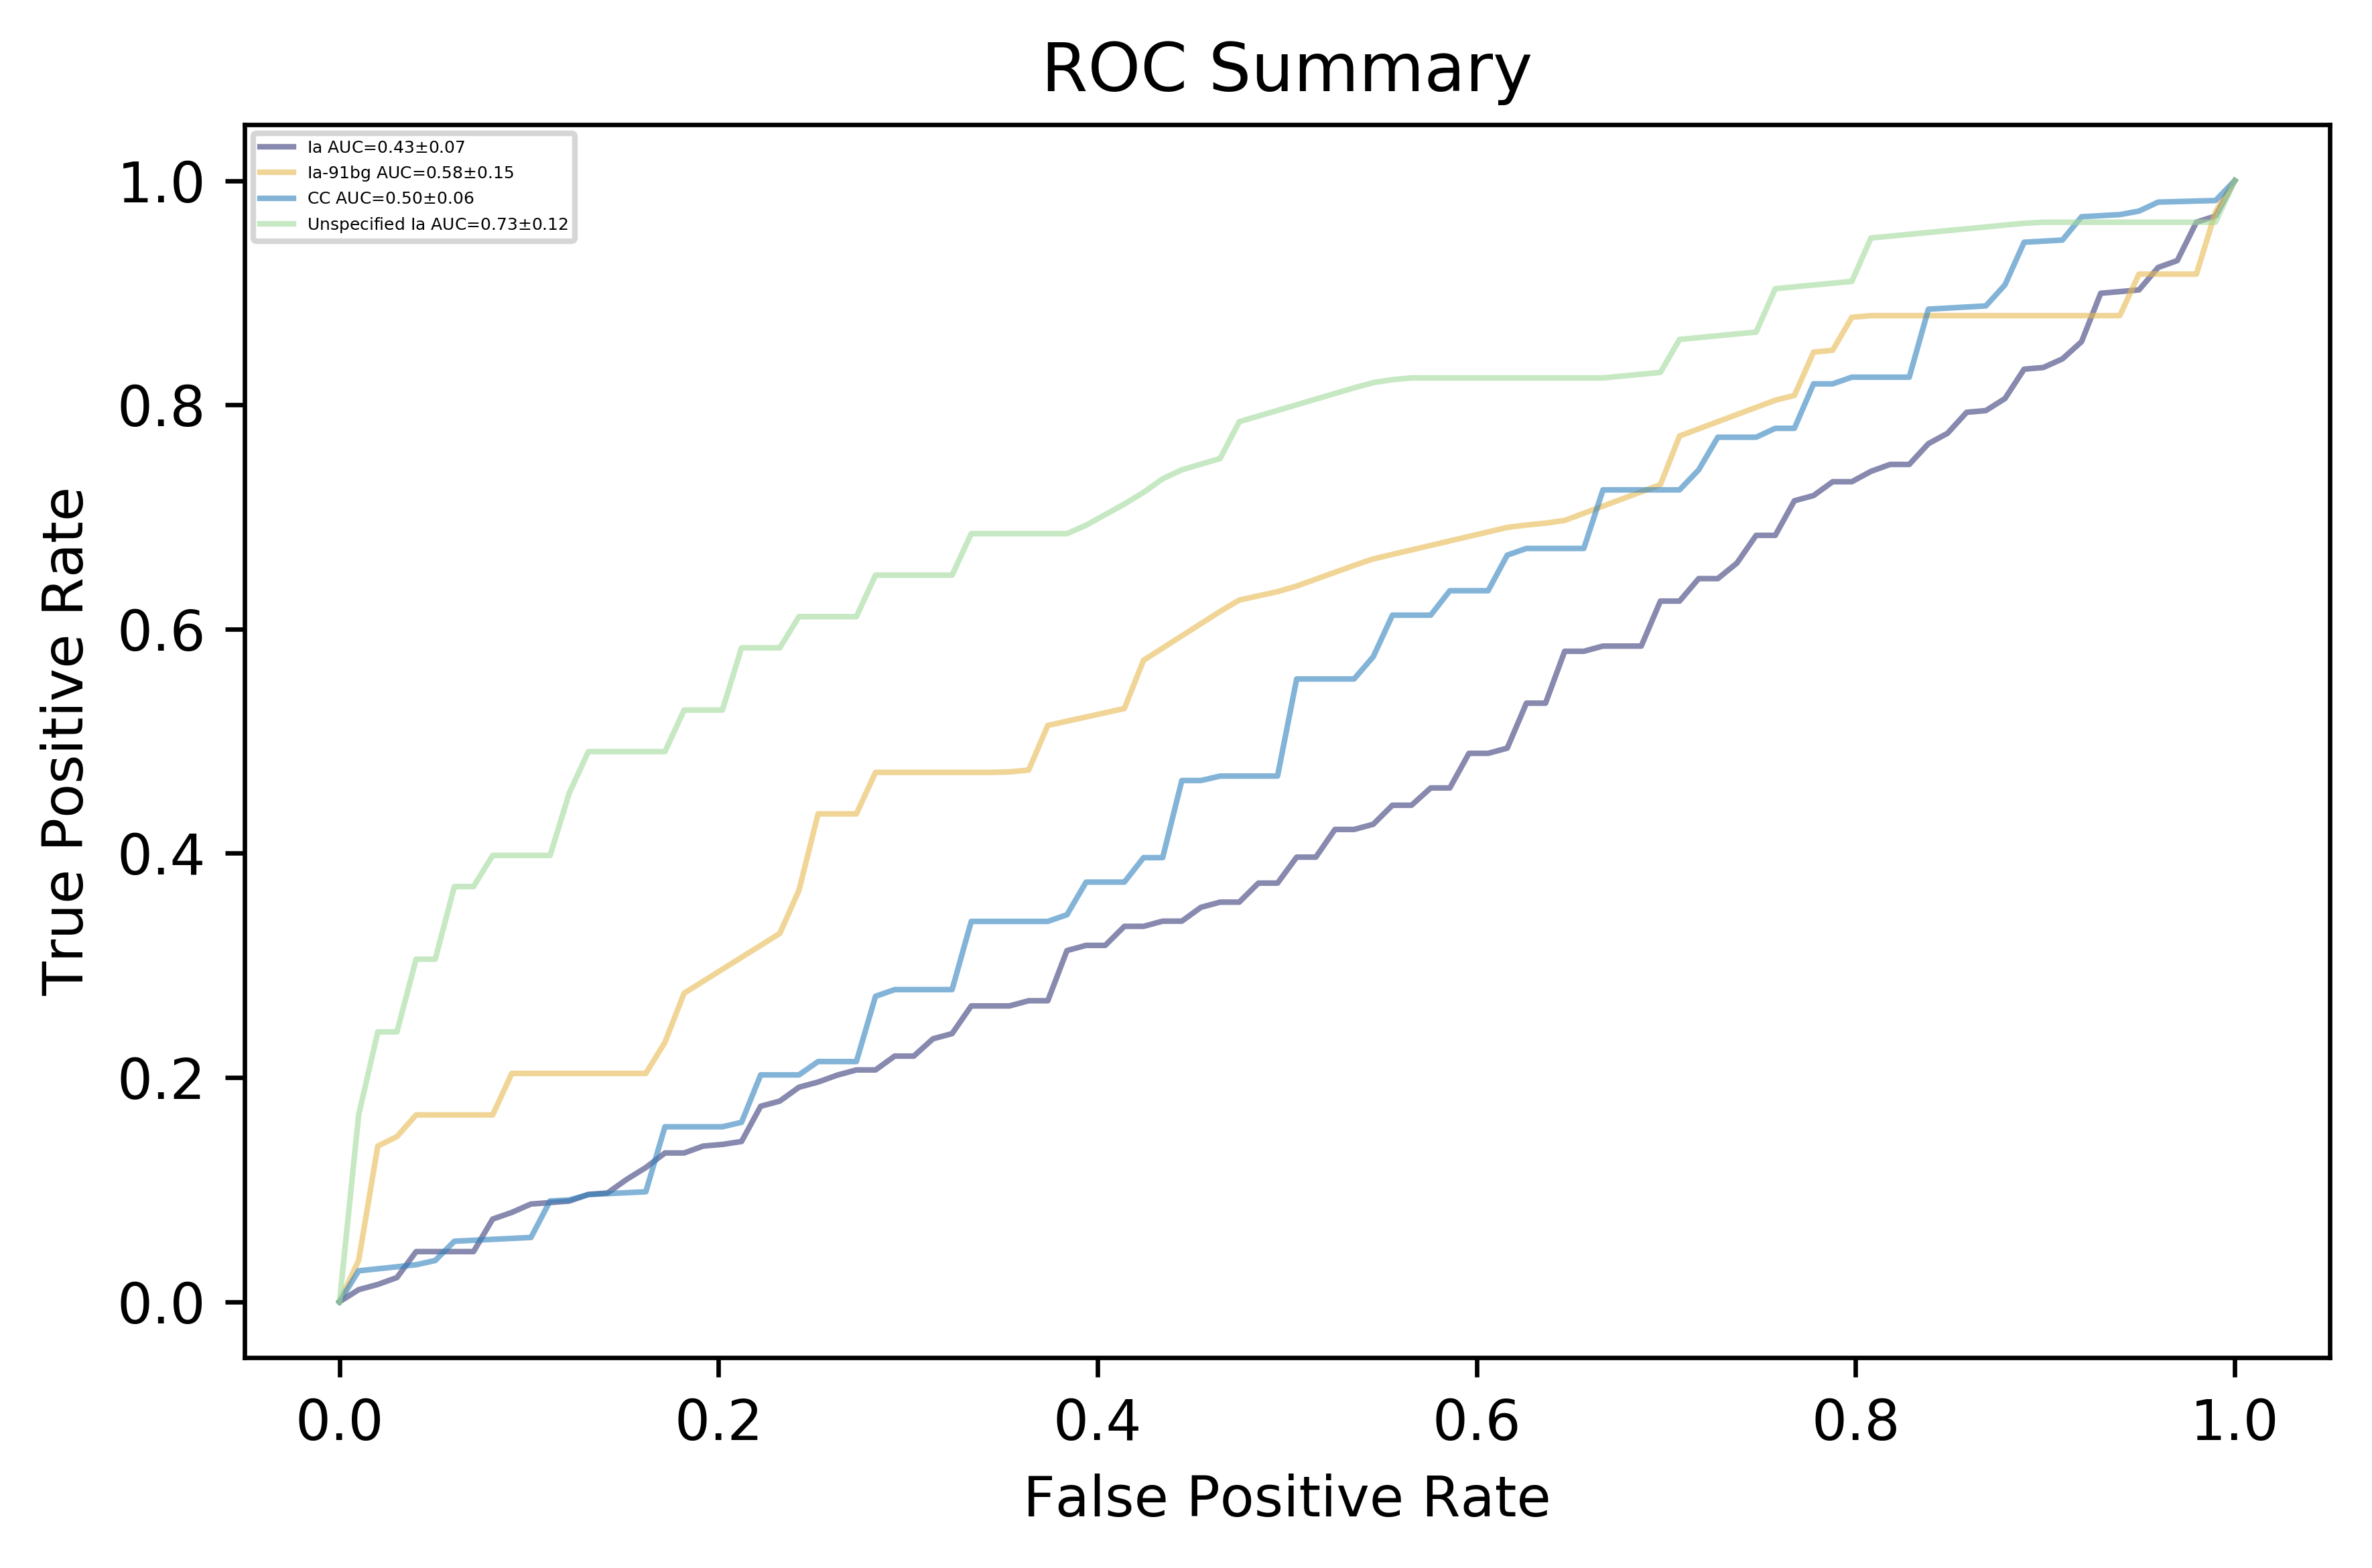

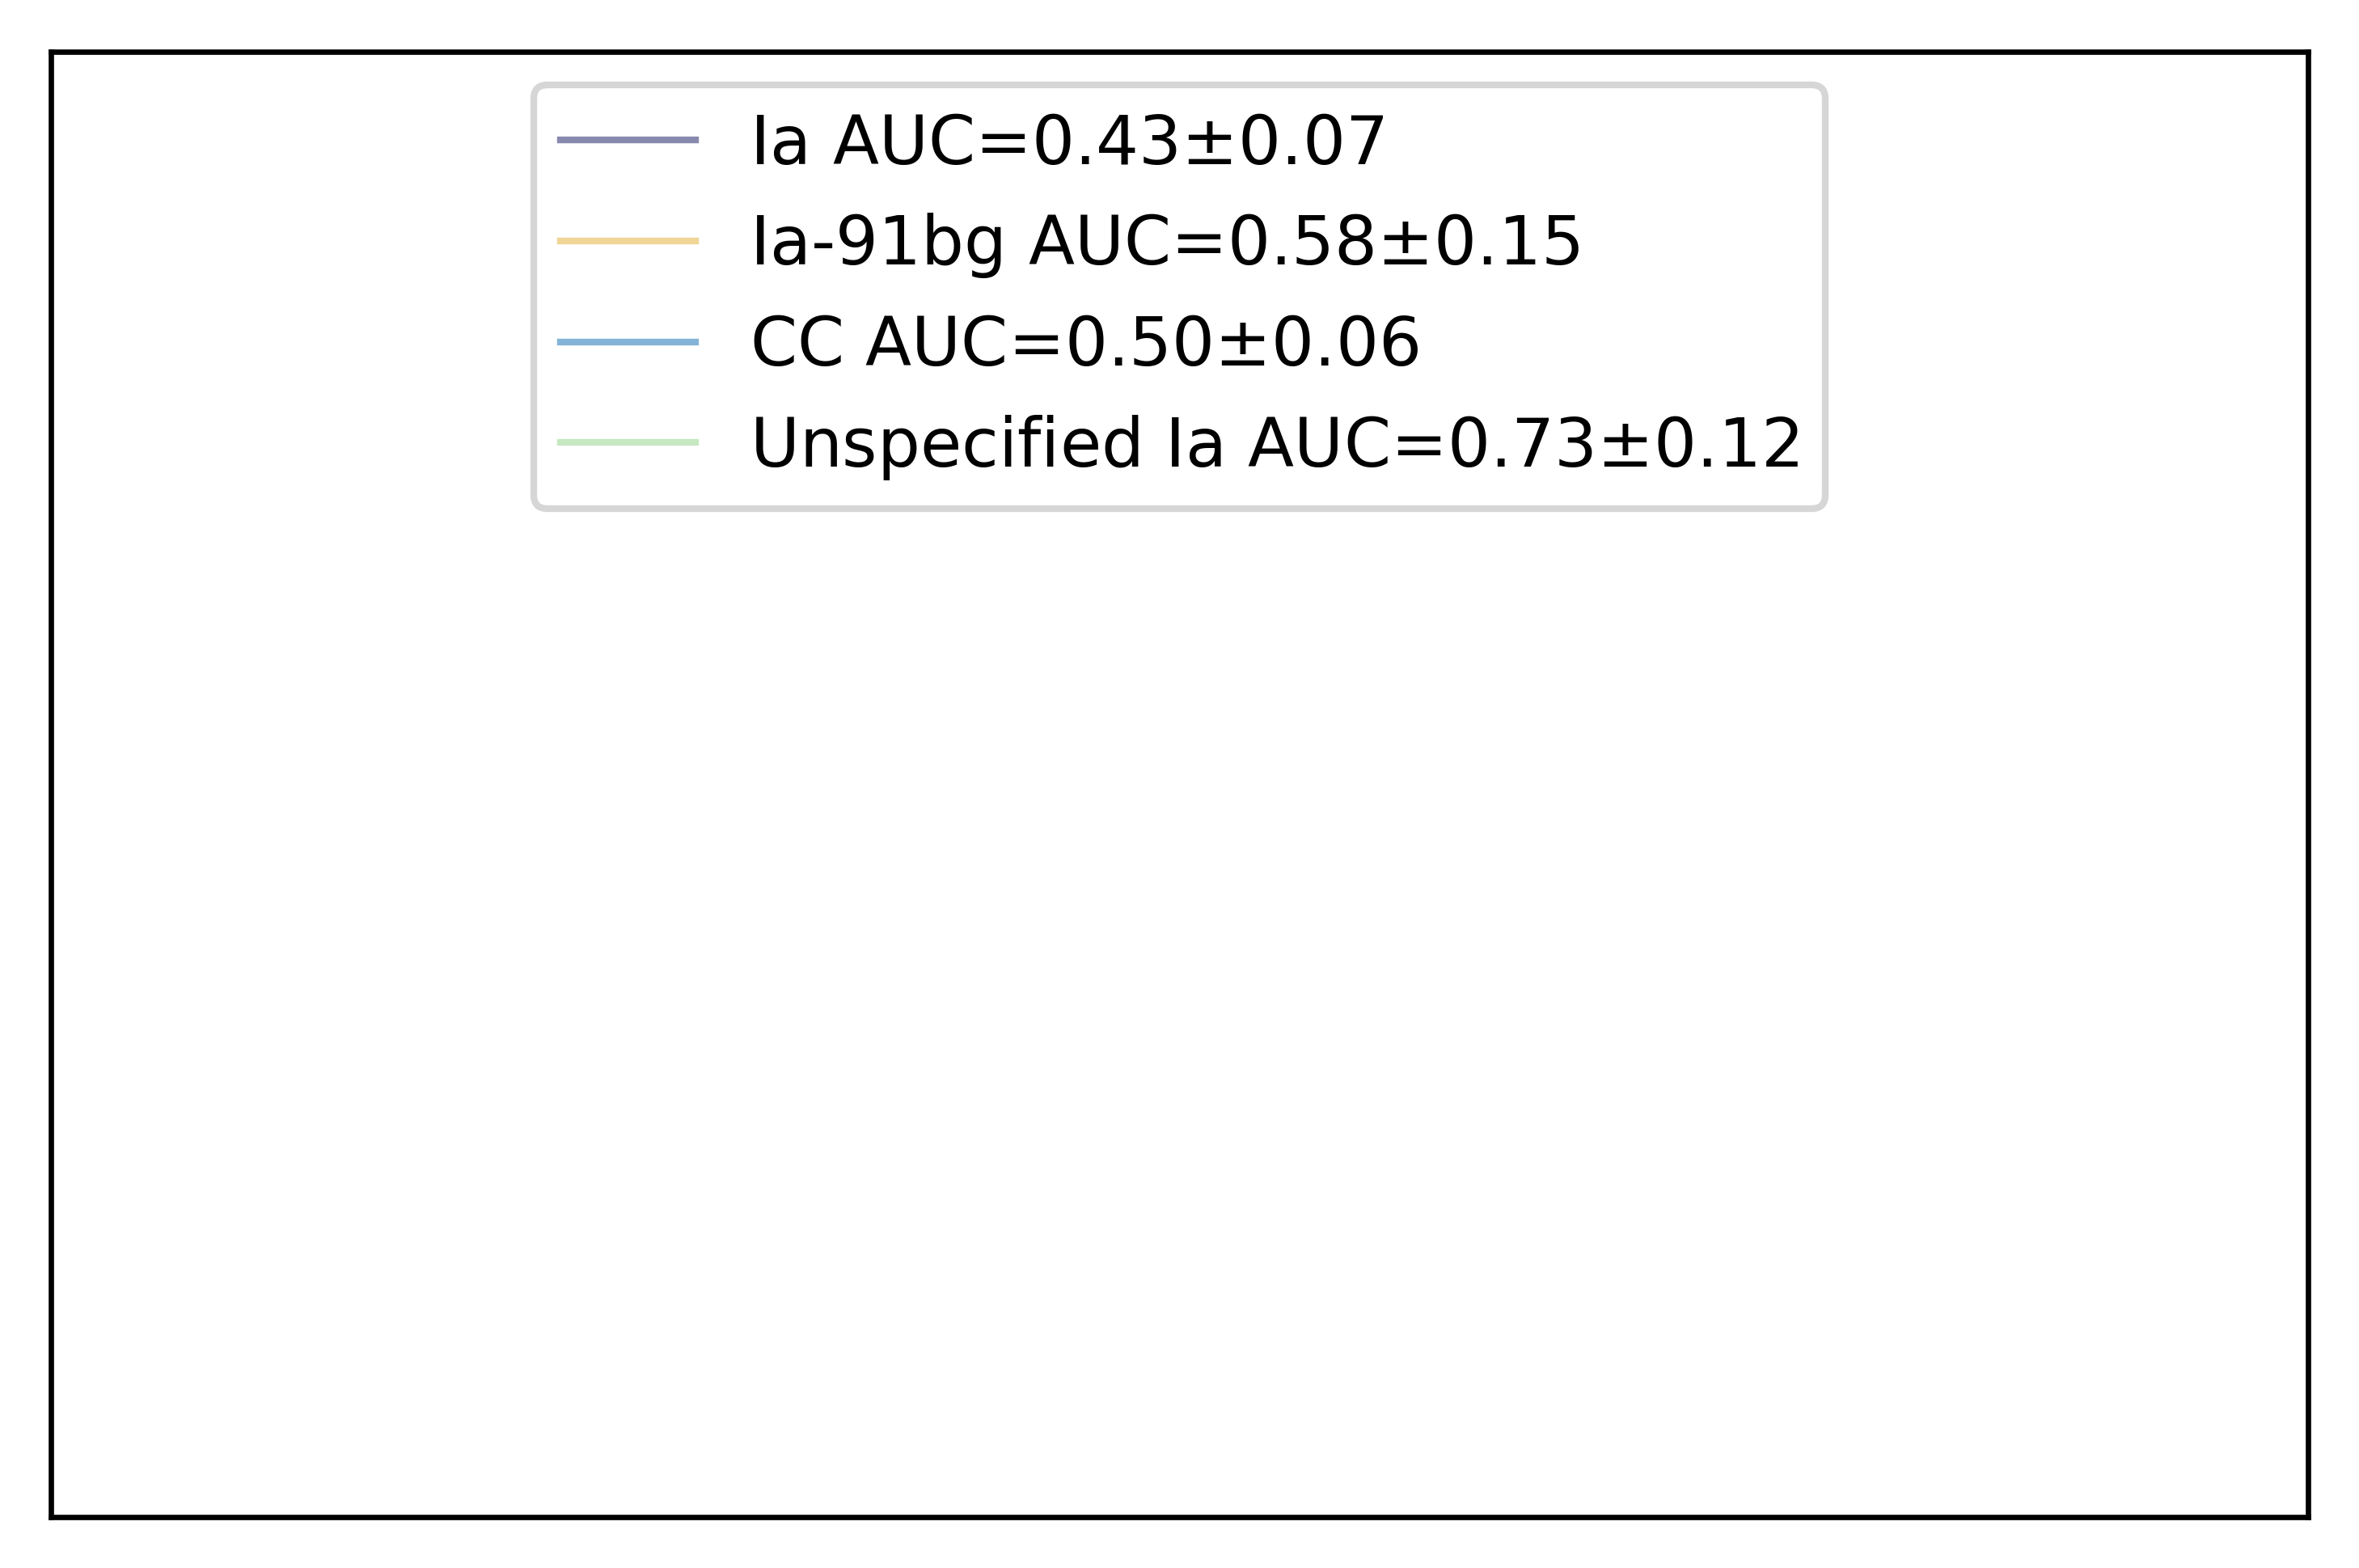

<Figure size 432x288 with 0 Axes>

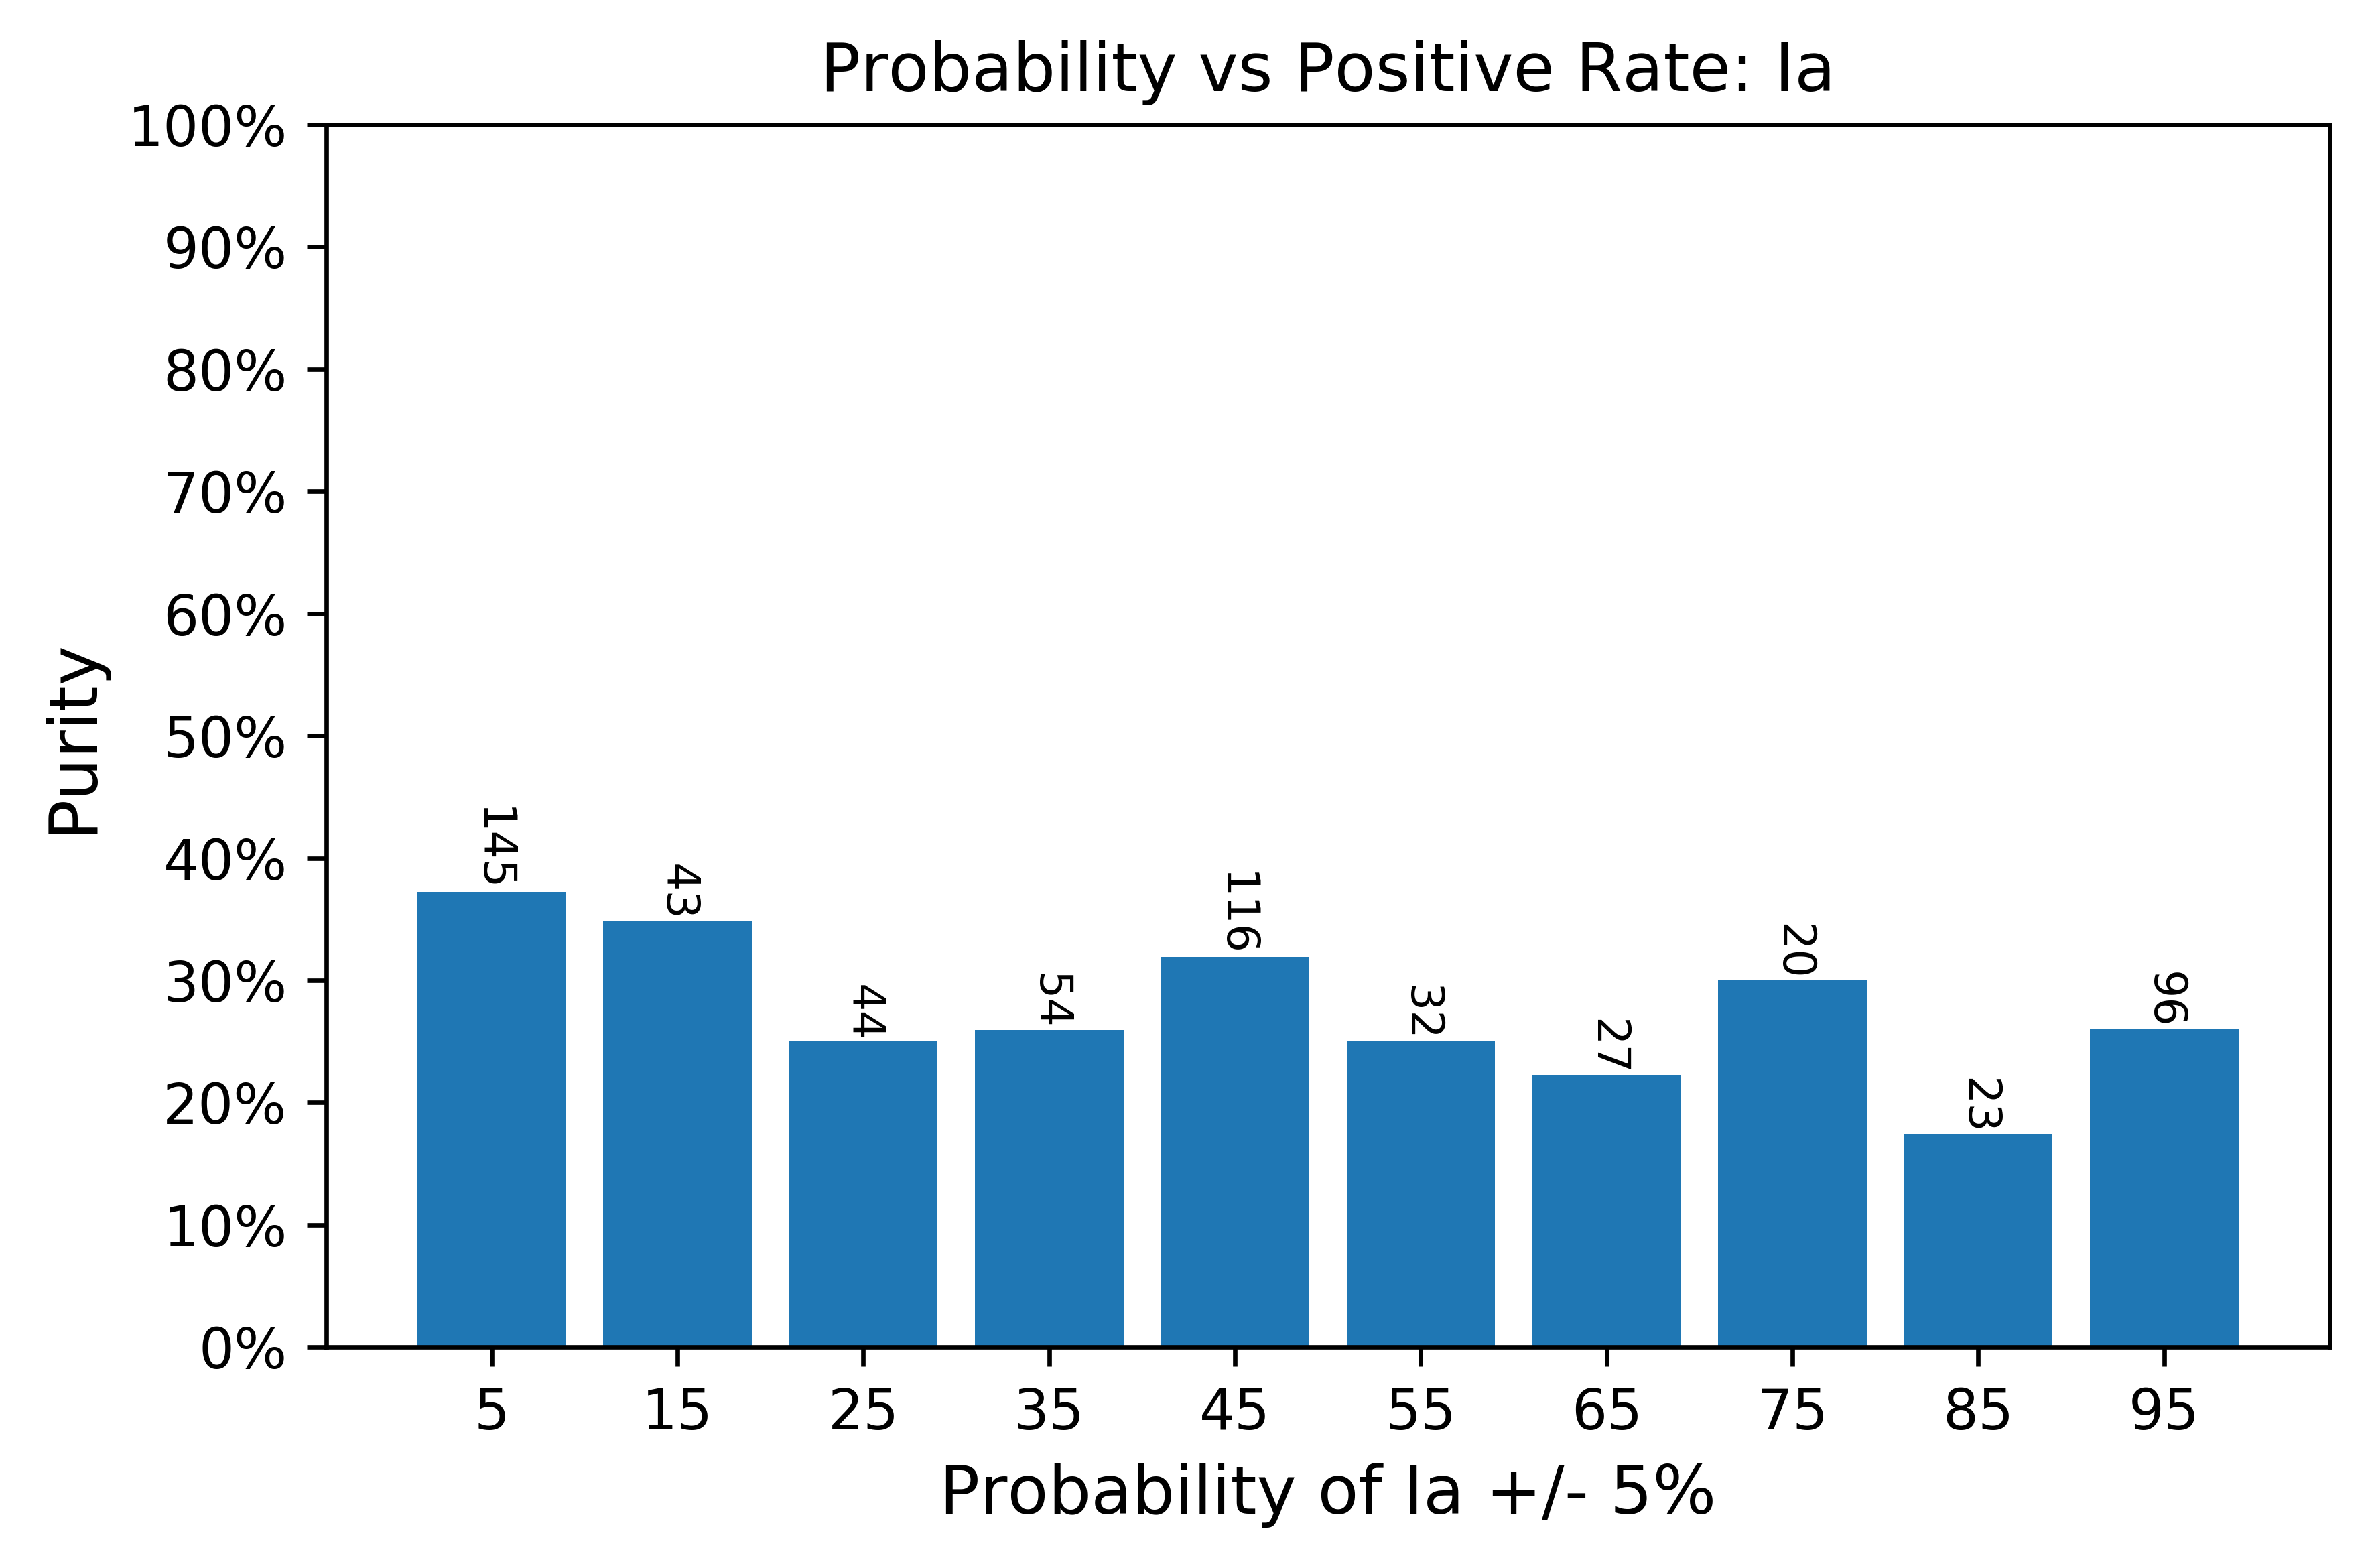

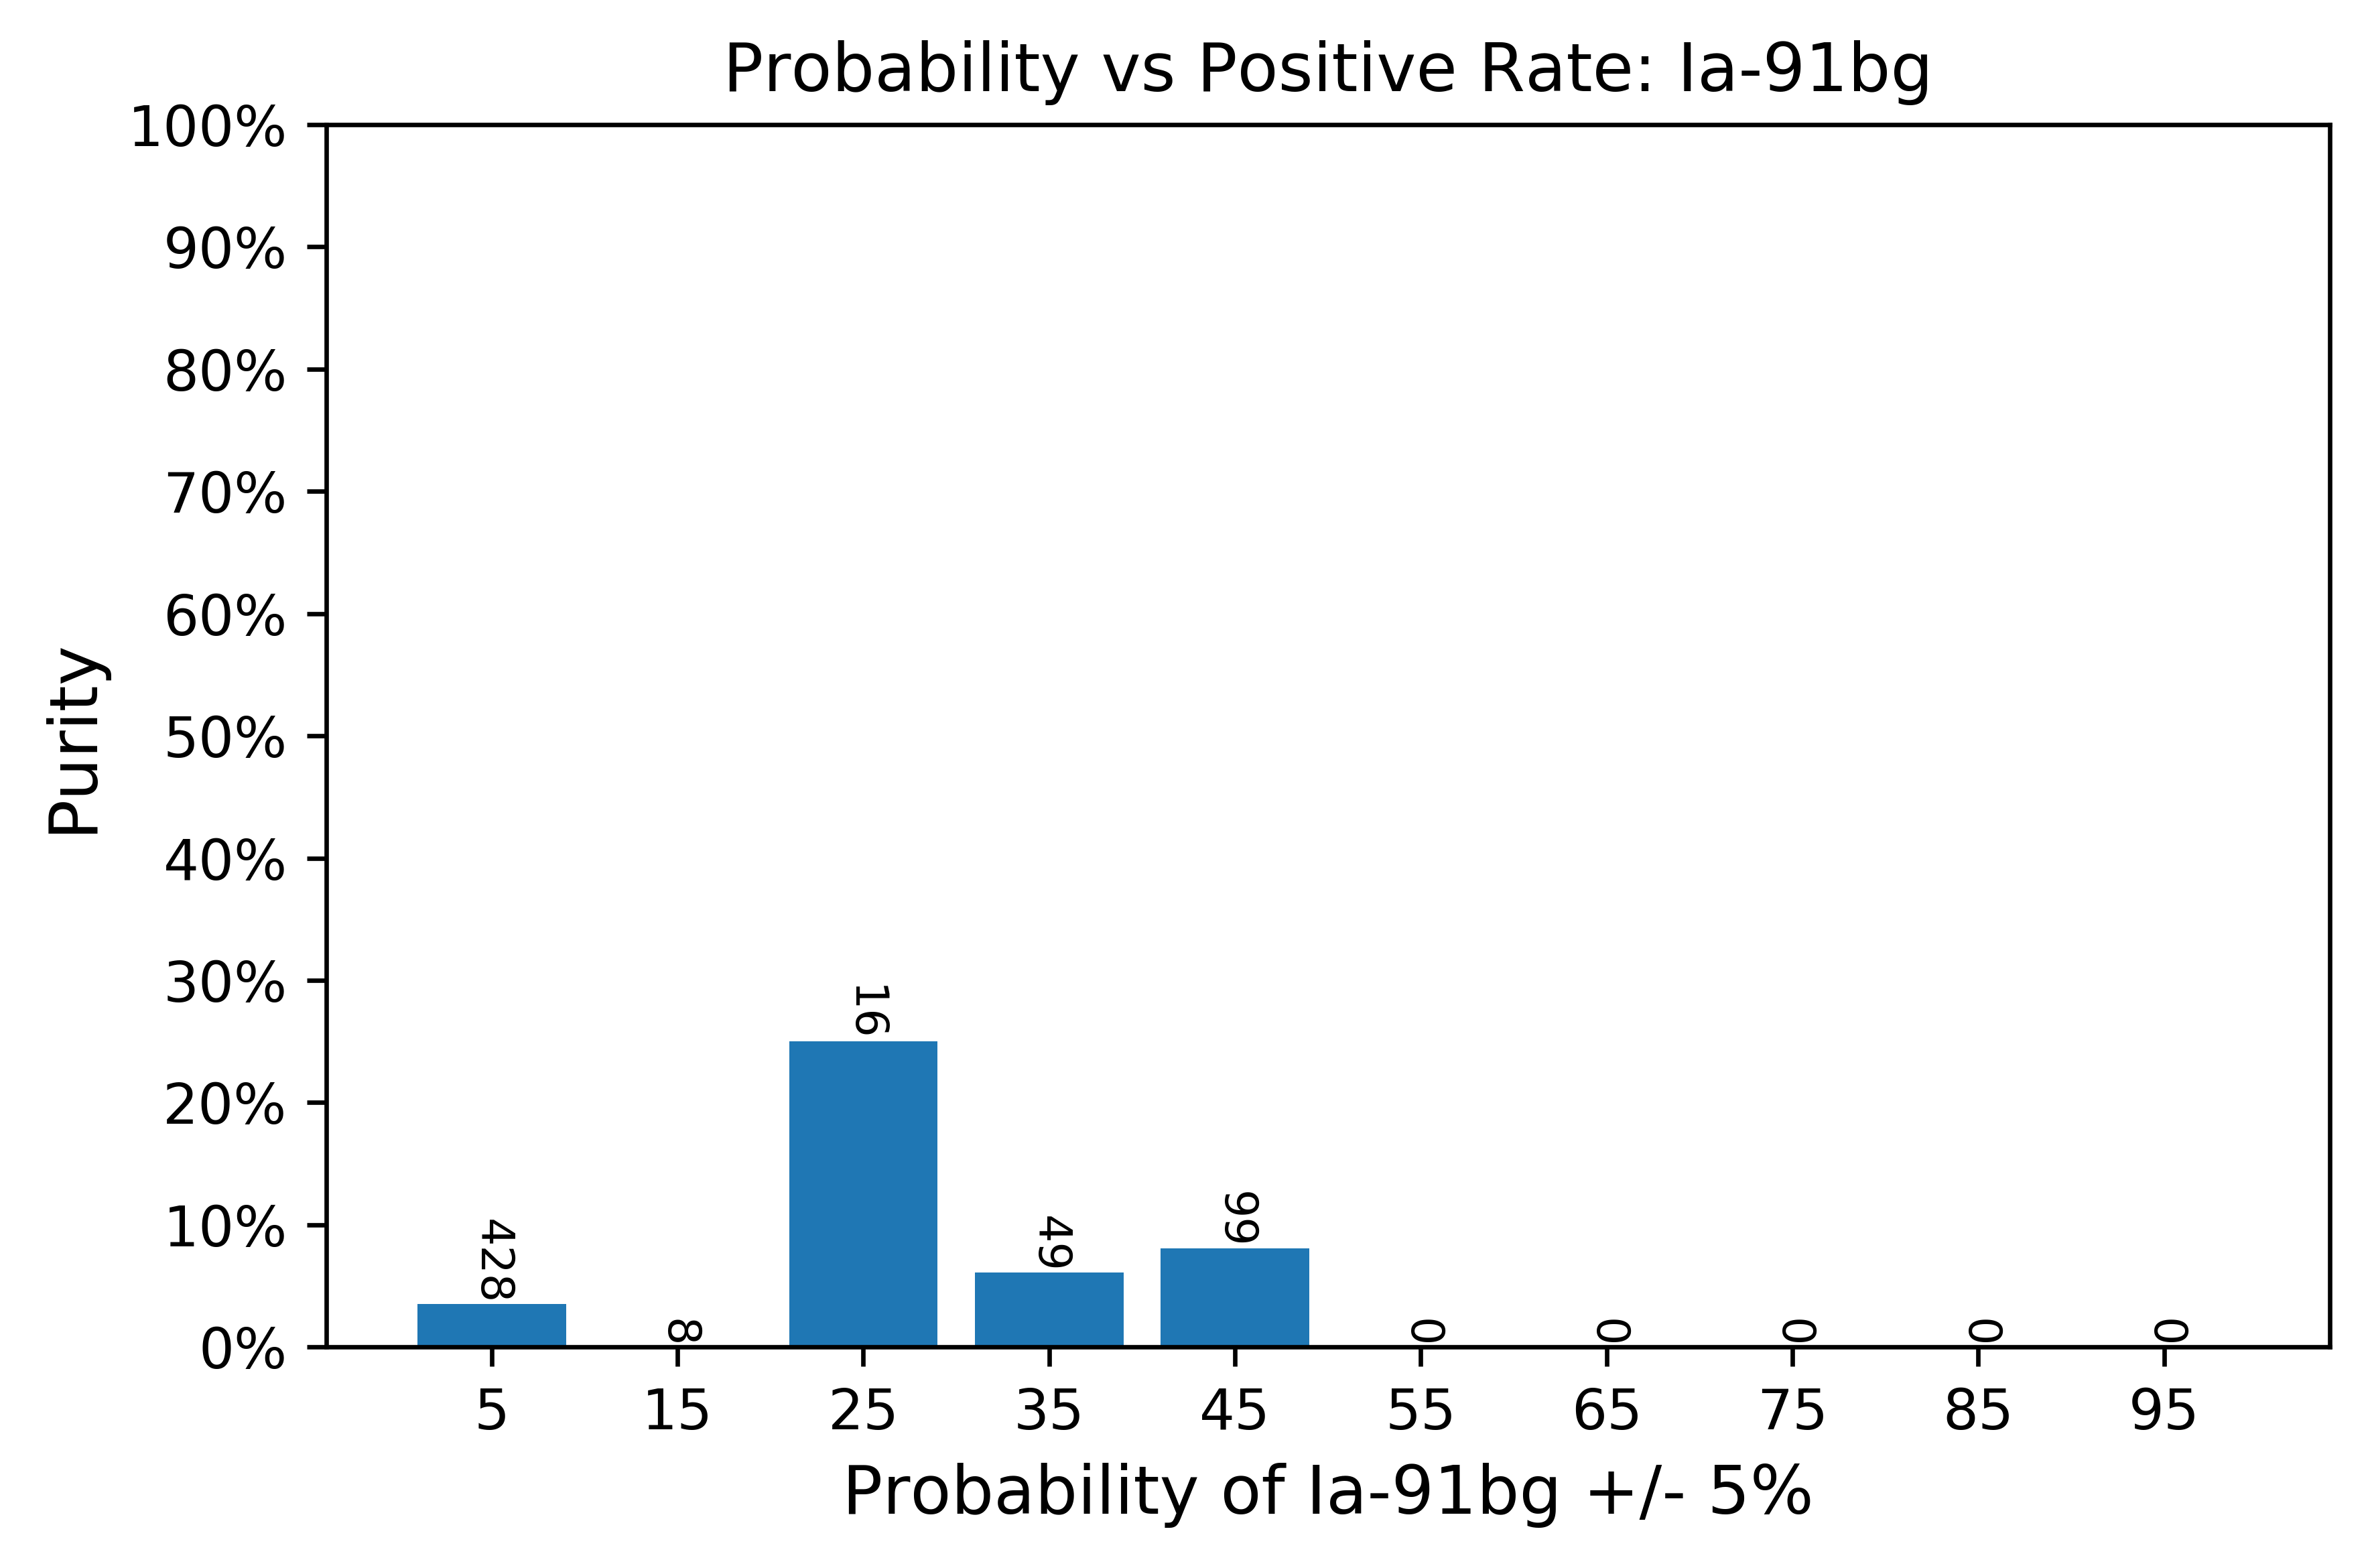

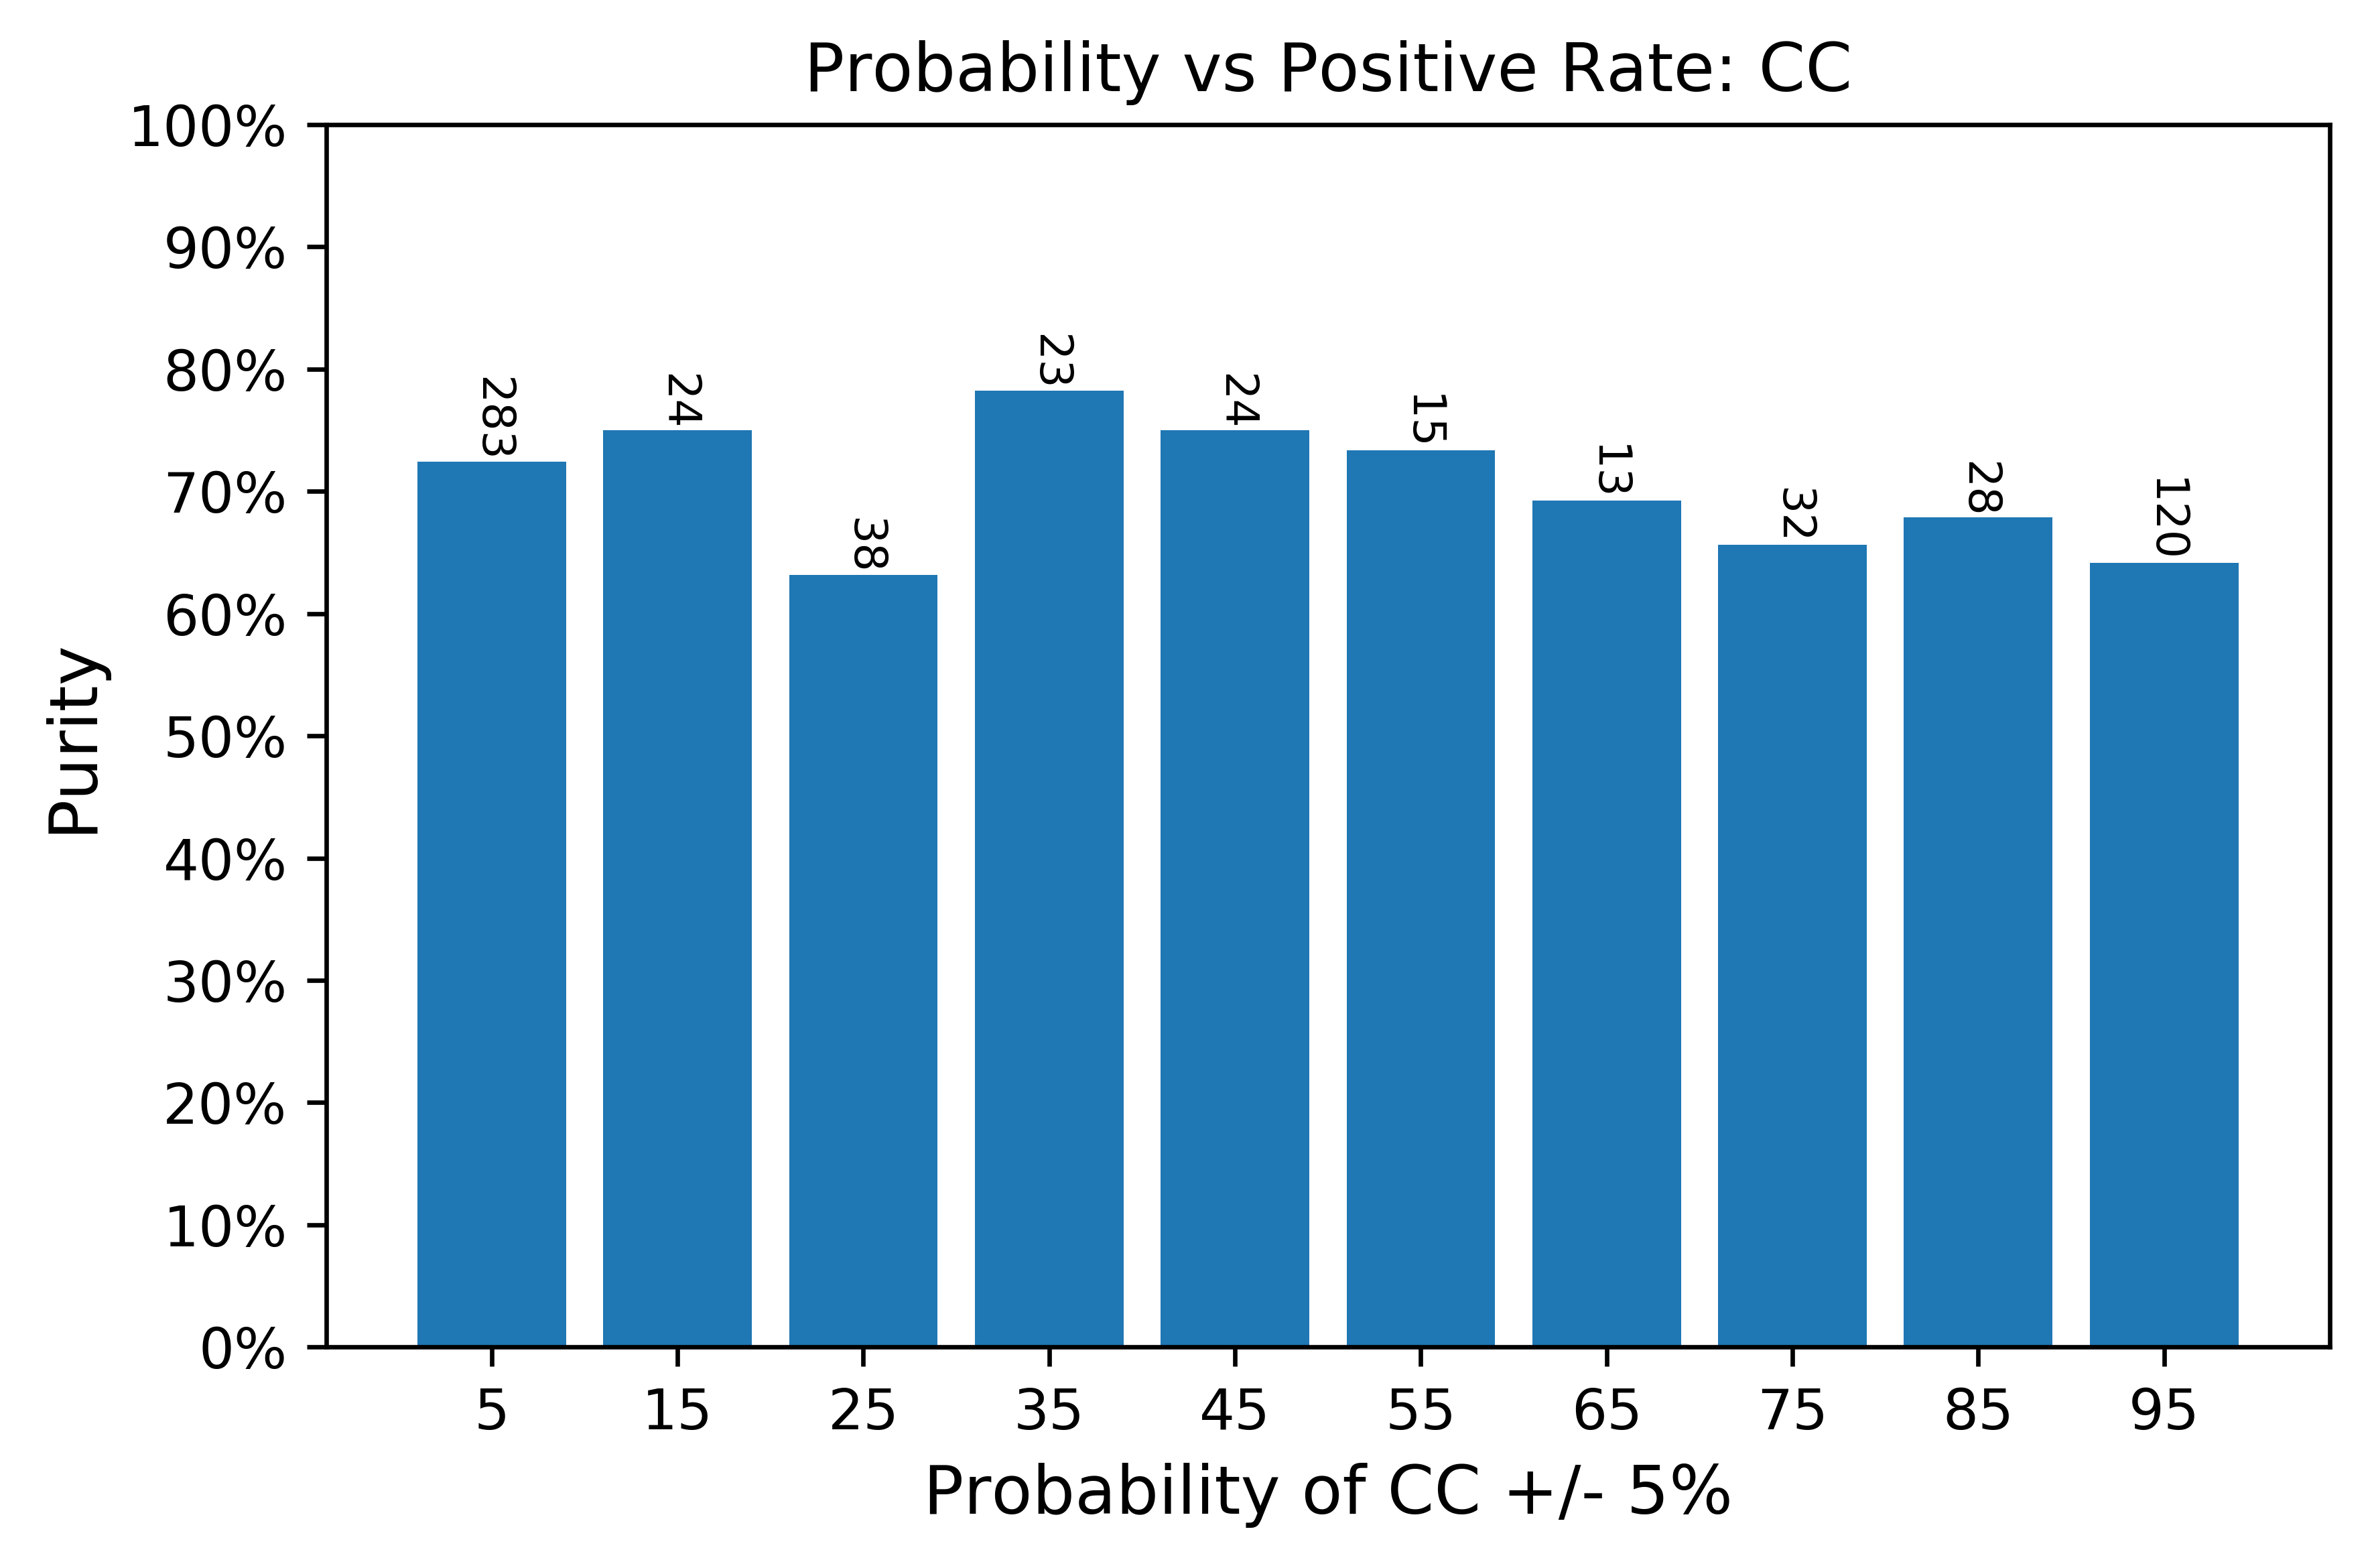

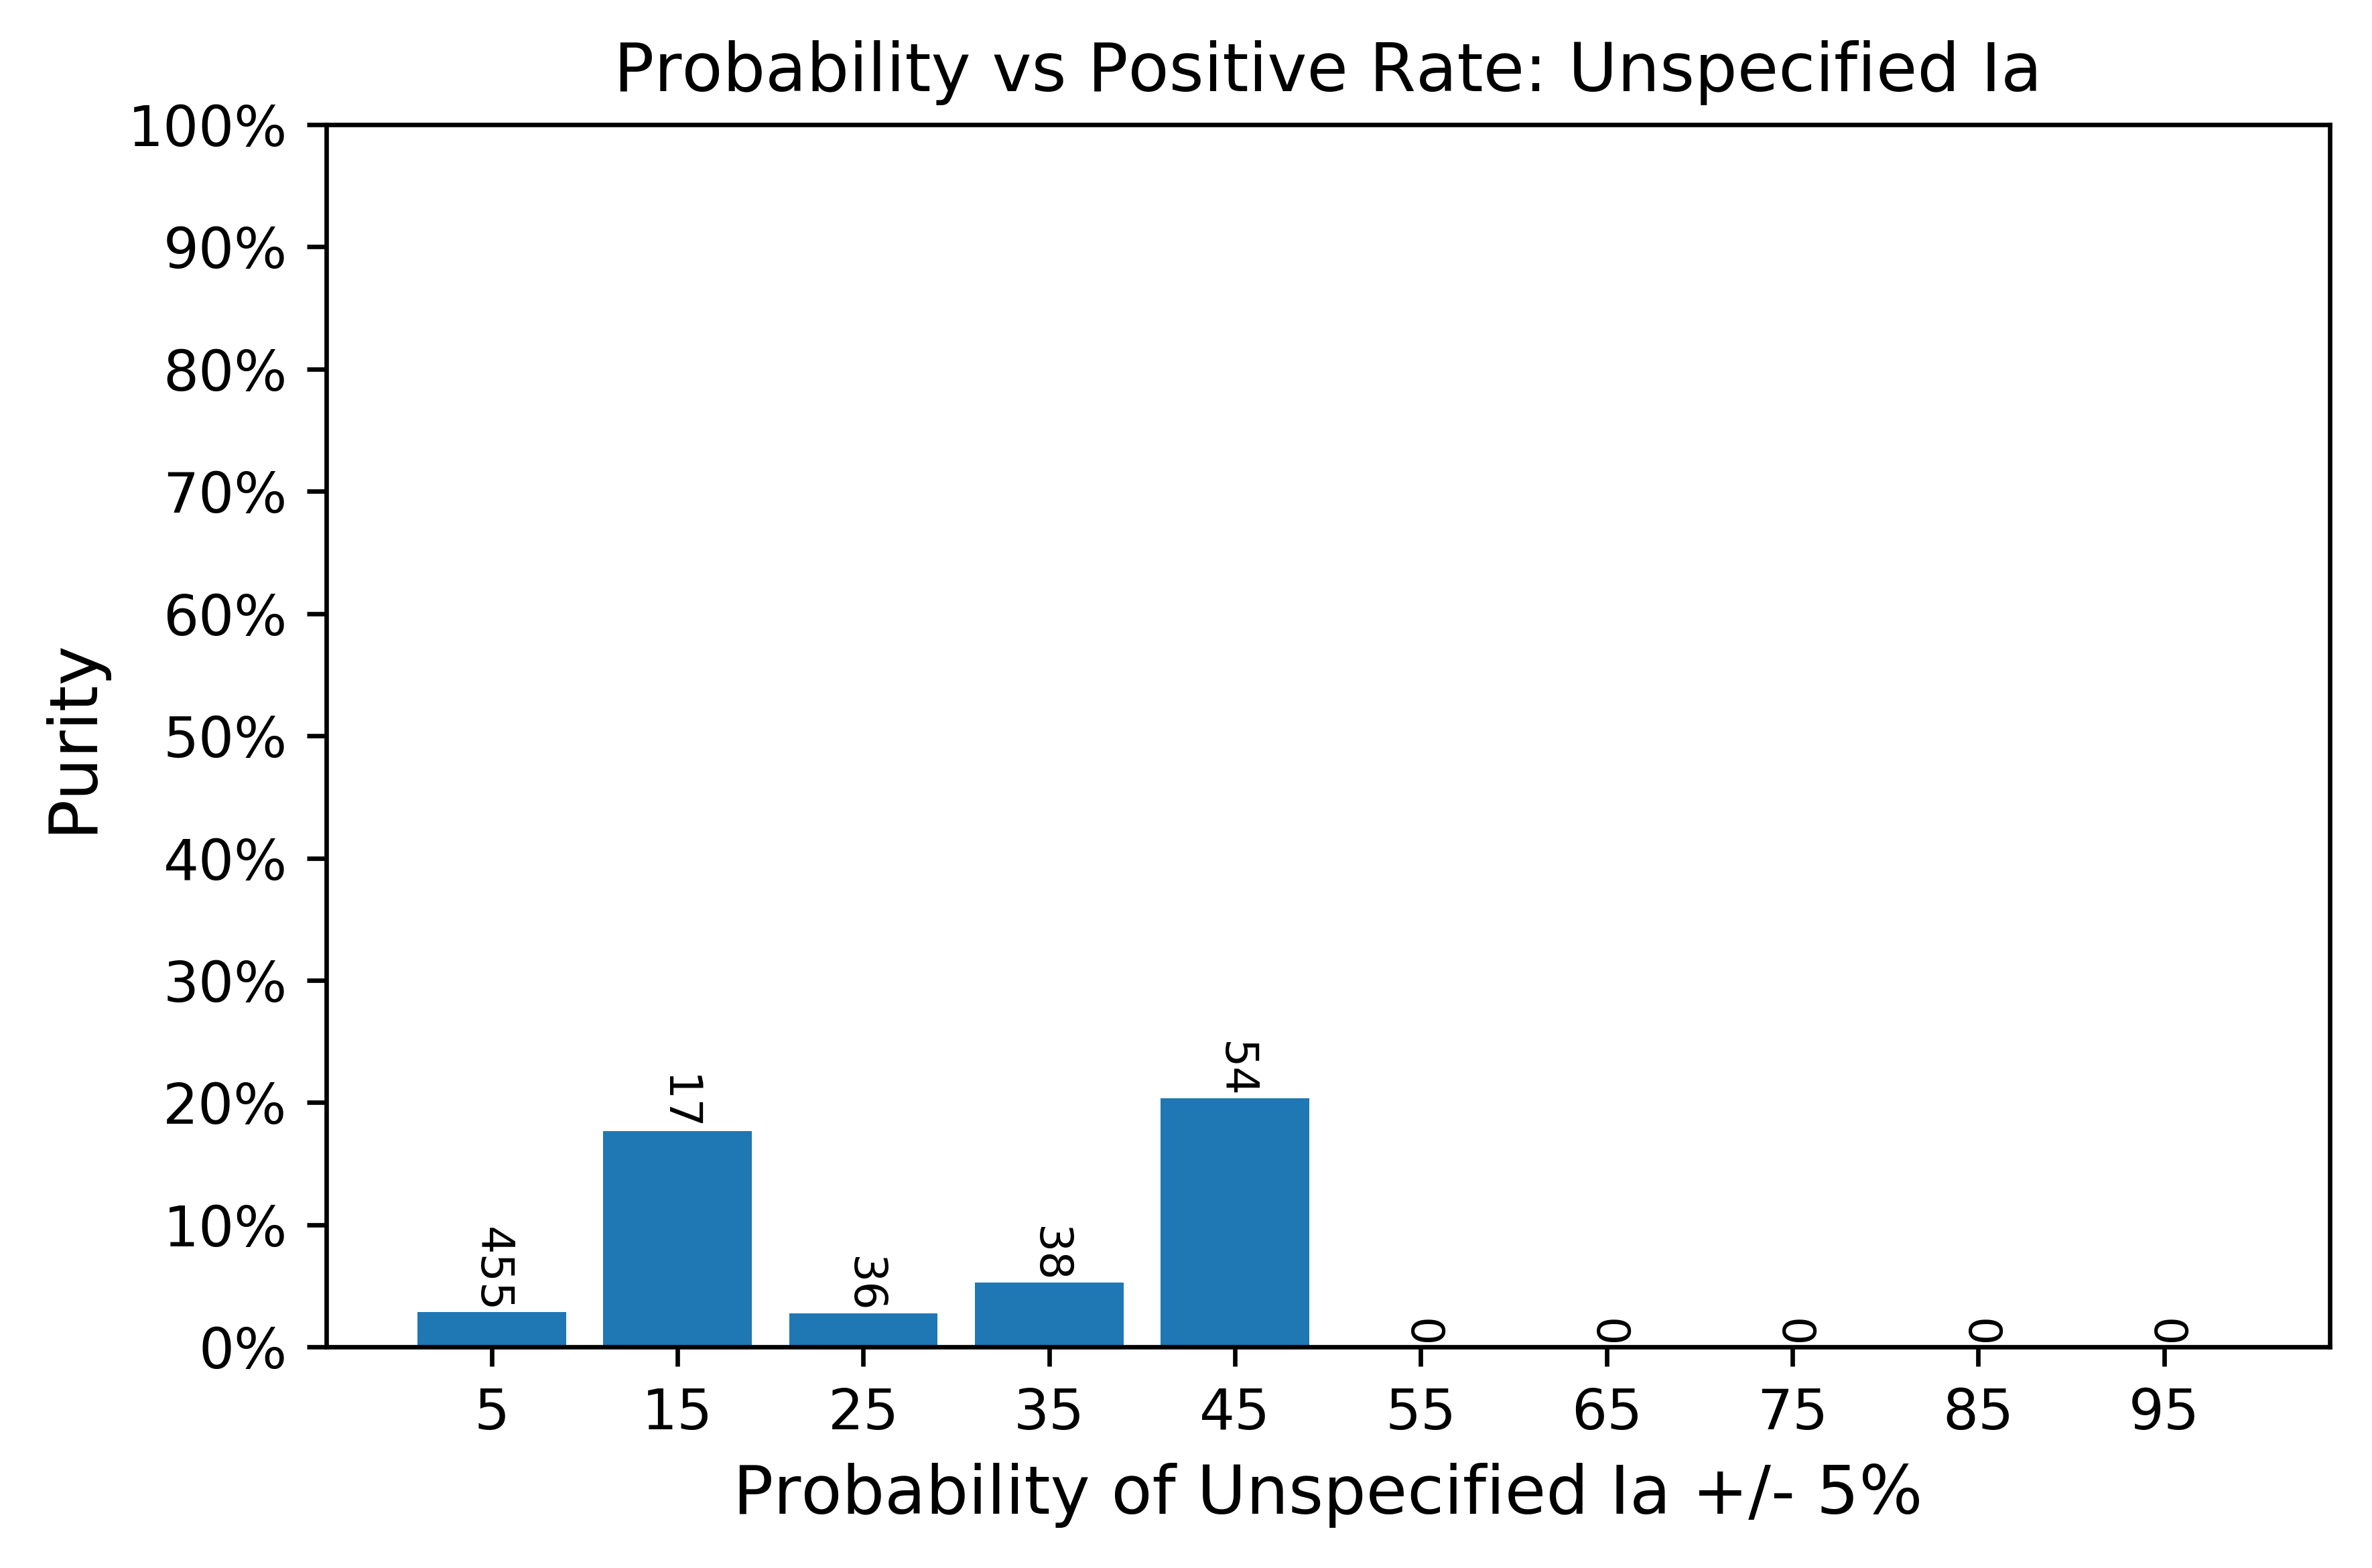

debug: Aggregated metrics
{'Ia': {'TP': 101, 'FN': 79, 'FP': 260, 'TN': 160, 'BS': 0, 'LL': 0}, 'Ia-91bg': {'TP': 30, 'FN': 0, 'FP': 570, 'TN': 0, 'BS': 0.0, 'LL': 0.0}, 'CC': {'TP': 160, 'FN': 260, 'FP': 79, 'TN': 101, 'BS': 0, 'LL': 0}, 'Unspecified Ia': {'TP': 180, 'FN': 0, 'FP': 420, 'TN': 0, 'BS': 0, 'LL': 0}}


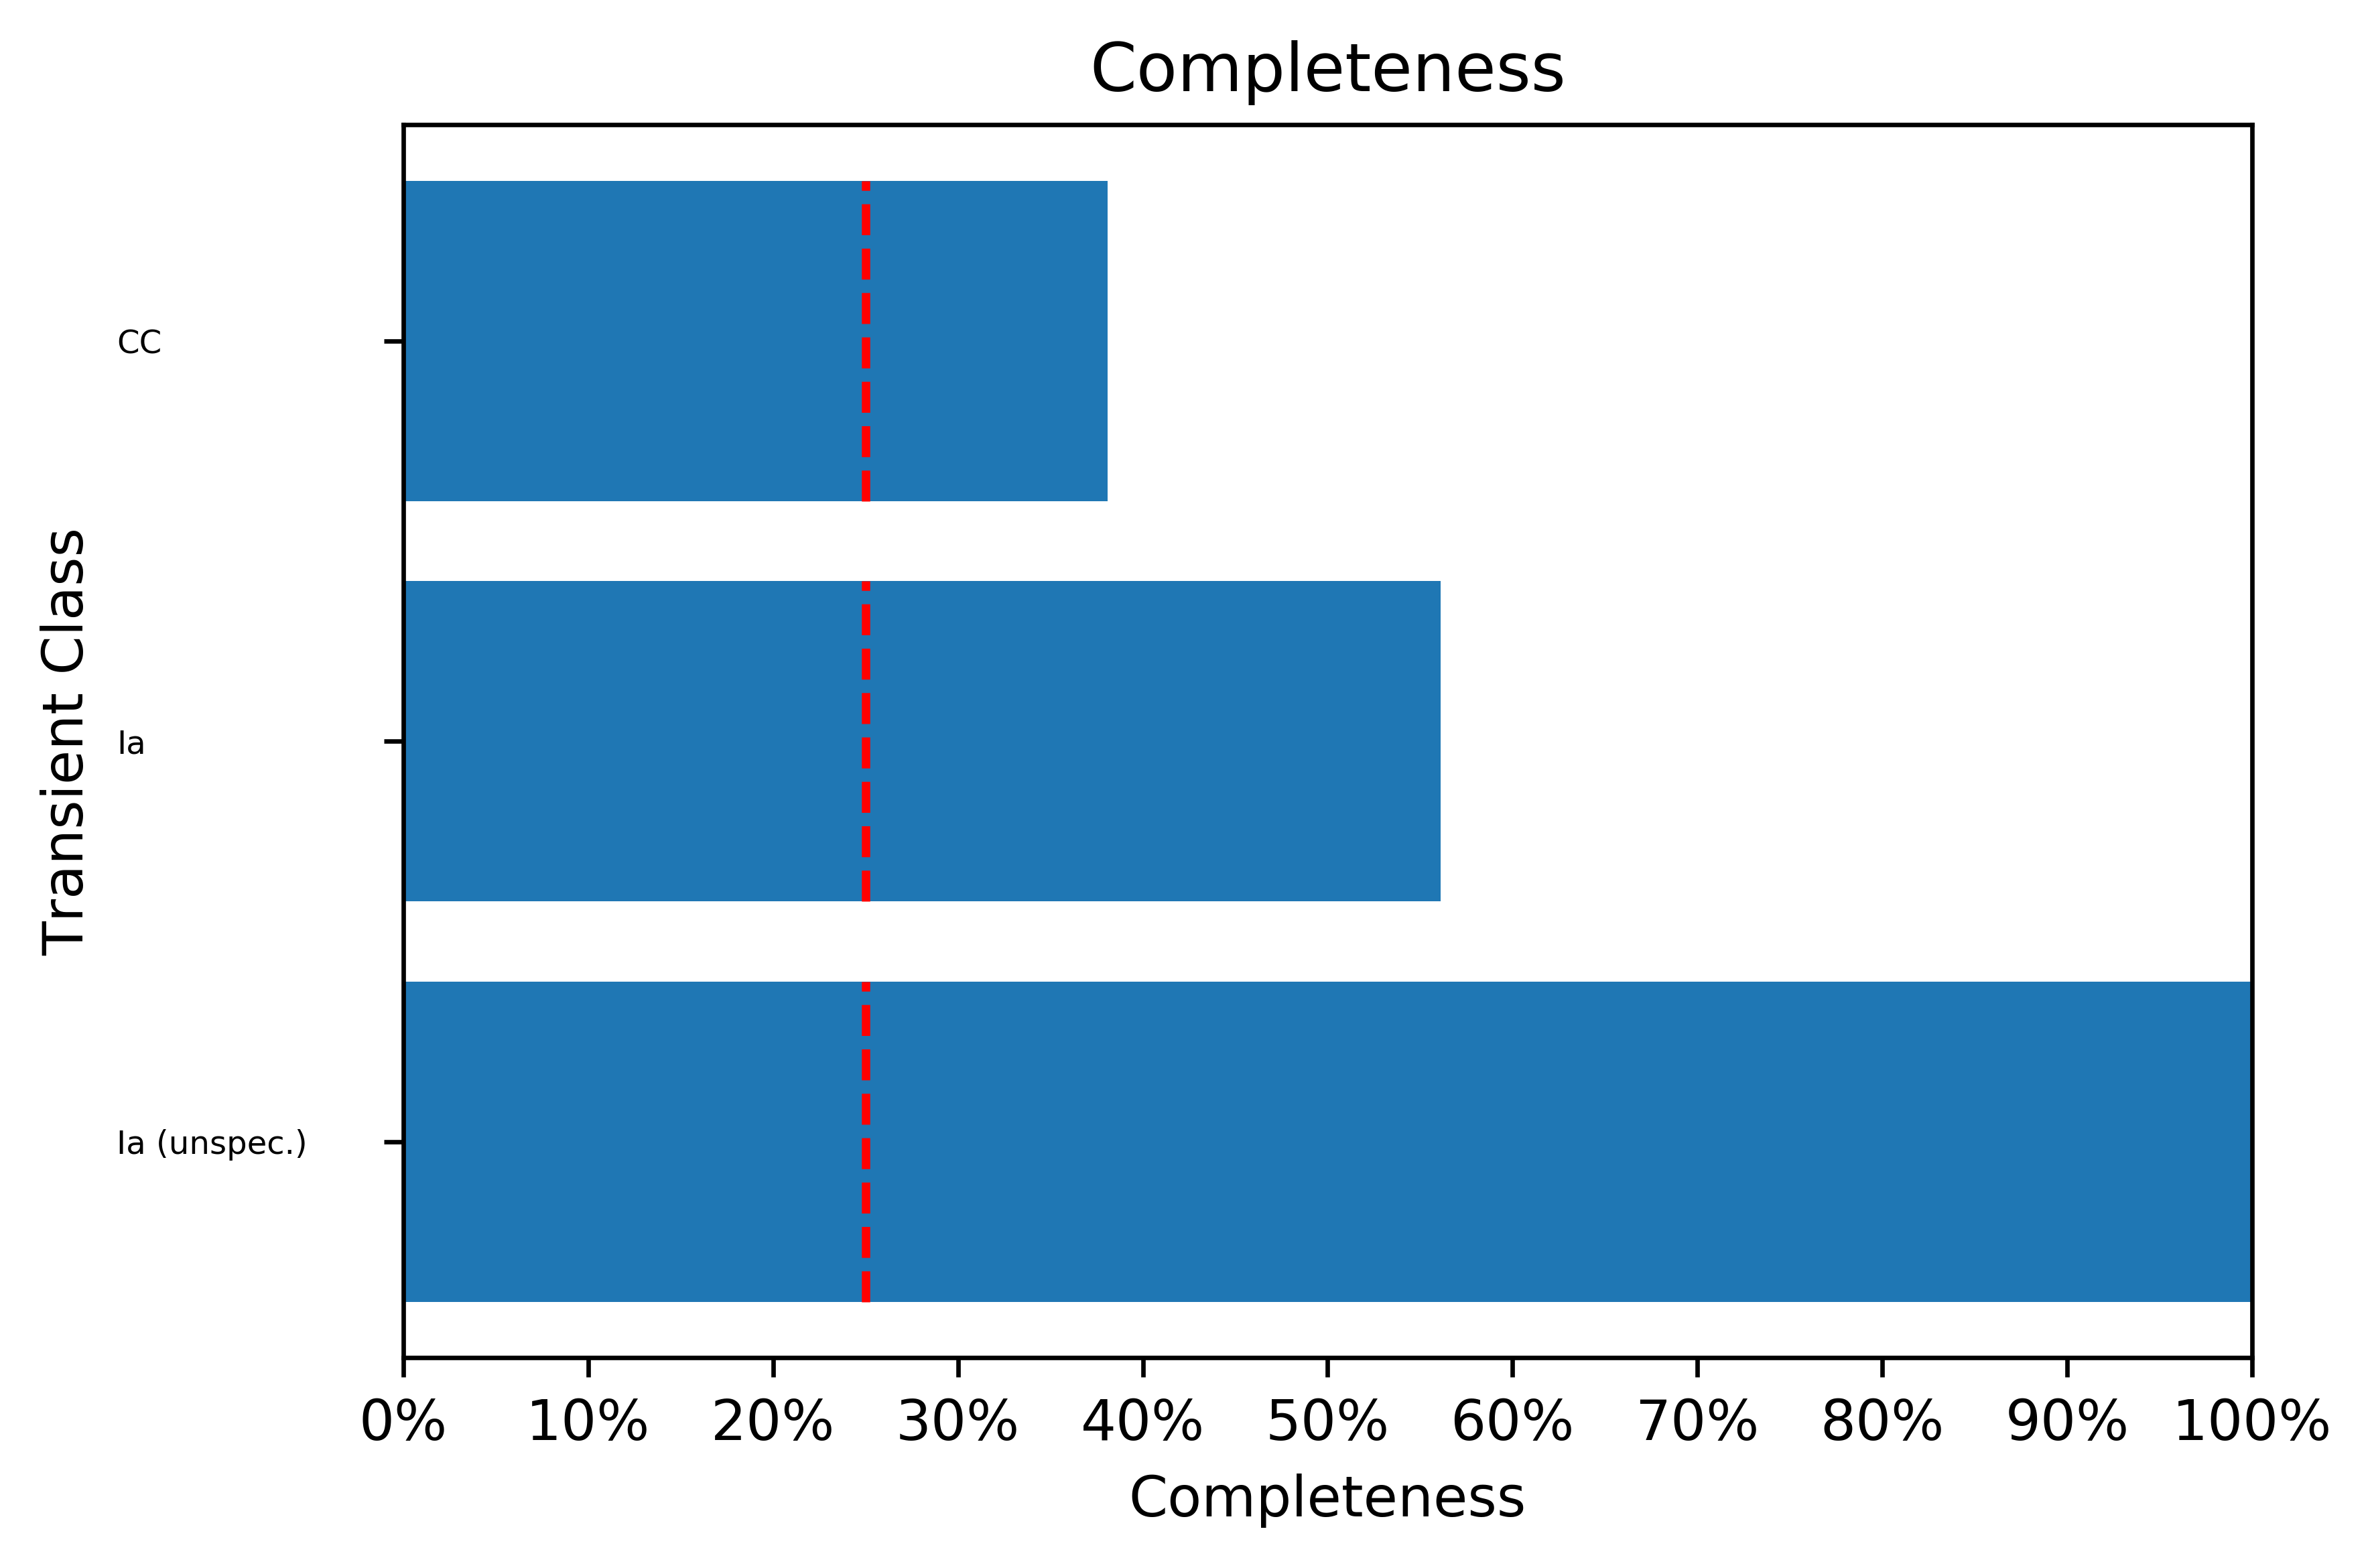

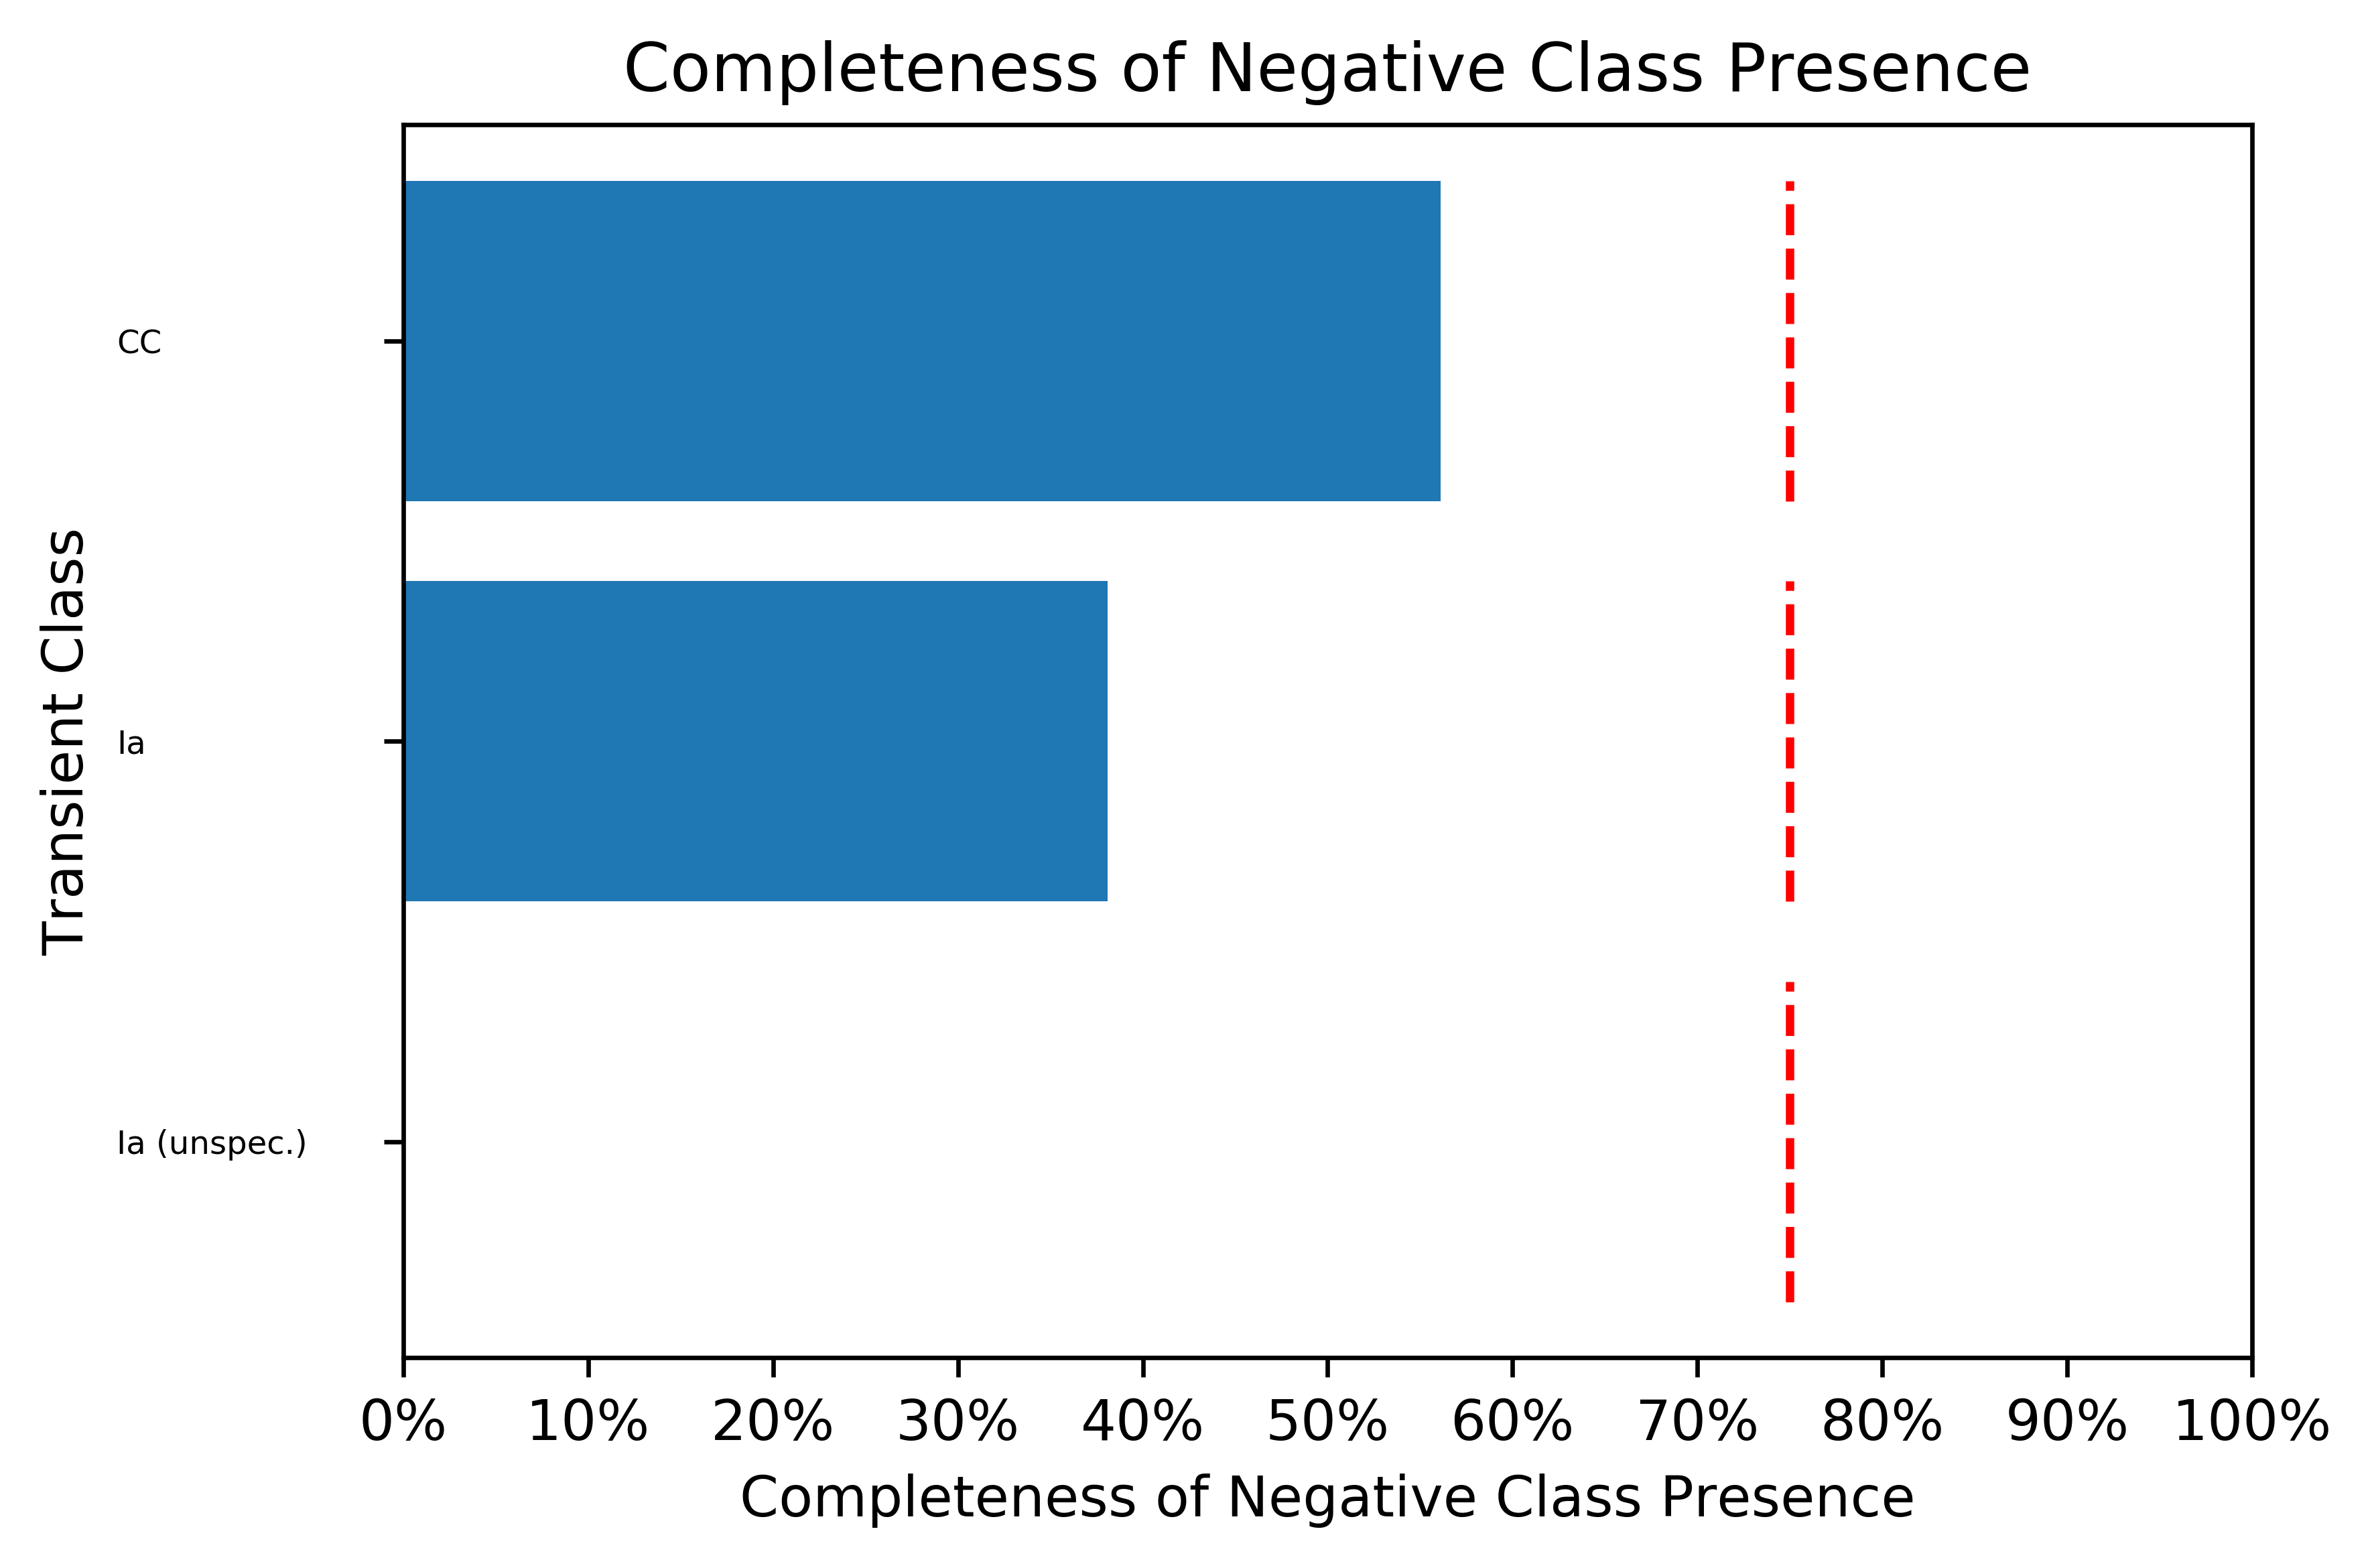

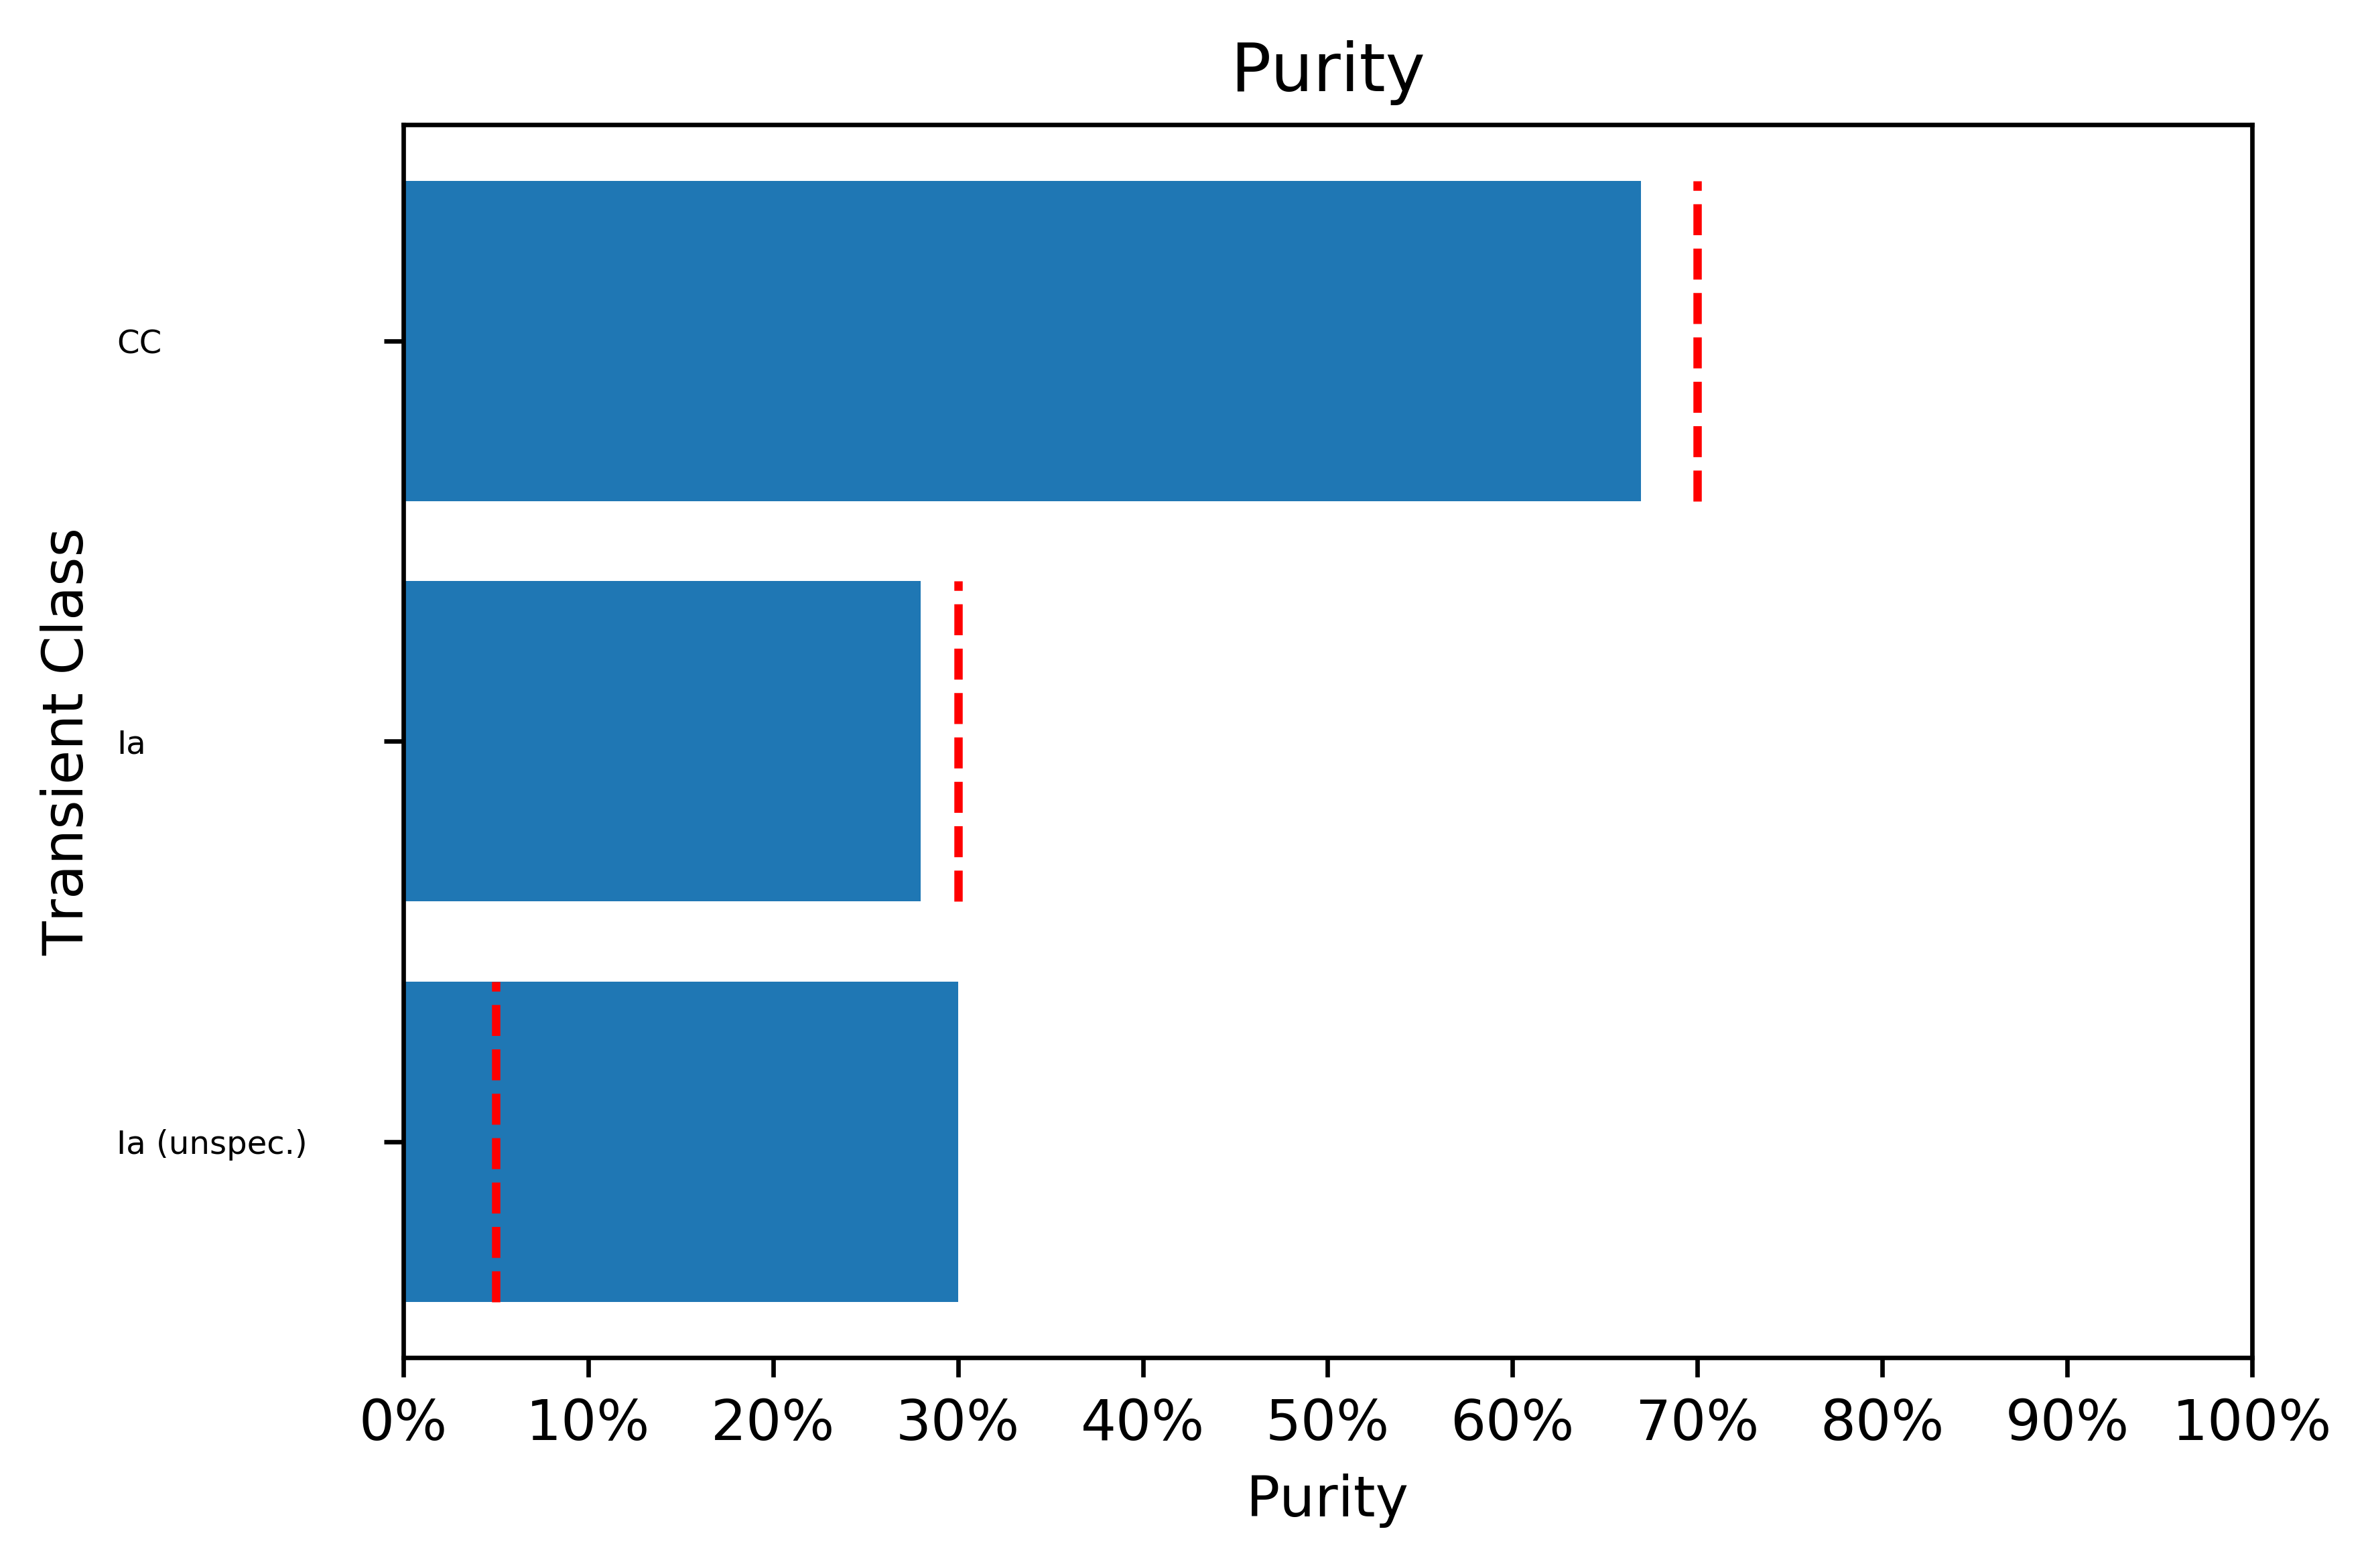

Ensemble KDE Model took 1.88 minutes to run 


In [2]:


model = MCKDEModel(
#          pca = 5,      
         scale = True,
         cols = filtered_cols,
         class_labels = ["Ia", "Ia-91bg","CC", ],
         transform_features = False,
         incl_redshift = True,
         num_runs = 3,
         min_class_size = 9,
         subsample = 10,
         folds = 3
         )

run_and_log_time(model)

In [ ]:
mag_cols = ['GALEXAIS_FUV', 'GALEXAIS_NUV', # GALEX
            'AllWISE_W1mag', 'AllWISE_W2mag', 'AllWISE_W3mag',  'AllWISE_W4mag', # AllWISE
            'PS1_gmag', 'PS1_rmag', 'PS1_imag' , 'PS1_zmag', 'PS1_ymag' #Pan-STARRS
           ]
ktree_model = KTreesModel(
         cols = mag_cols, #filtered_cols,
#          class_labels = ["Ia", "Ic"],
         transform_features = False,
         incl_redshift = True,
         num_runs = 1,
         min_class_size = 9,
#          subsample = 10,
         folds = 3
         )
run_and_log_time(ktree_model)

In [ ]:


model = MCKDEModel(
#     cols = mag_cols,
# EXCLUDE: 'I',  '_PEC_SN', '_SN',  '_CONFLICT_I_II',  '_W_UVOPT',  '_CONFLICT', 
#          cols = PS1_MAG_COLS + PS1_Bb_COLS + AllWISE_MAG_COLS,
         cols = ['z_mag', 'z_err'],
#          class_labels = valid_class_labels,
#          class_labels = ["Ia" , "II P"],
#          cols = filtered_cols,   
#          class_labels=valid_class_labels,
#          pca = 5,
         transform_features = False,
         incl_redshift = True,
         num_runs = 1,
         min_class_size = 9,
         folds = 3,
         subsample = 10
         )
run_and_log_time(model)

In [ ]:
from thex_data.data_consts import cat_code
all_valid_class_names = list(cat_code.keys())

In [ ]:
model = Network(
         cols = PS1_MAG_COLS + PS1_Bb_COLS + AllWISE_MAG_COLS,
        class_labels = all_valid_class_names,
#          class_labels = ['Ia'],
         transform_features = False,
         incl_redshift = True,
         num_runs = 1,
         min_class_size = 9,
         folds = 3
         )
run_and_log_time(model)

In [ ]:
# Old filters

unique_classes = [
#                 "Other",
#                   "_PEC_SN",
#                   "_W_HIENERGY",
#                   "_W_UVOPT",
#                   "Impostor",
#                   "Star",
#                   "Variable",
#                   "Candidate",
                  "SE",
#                   "I",
                  "AGN",
                  "CC",
                  "II",
                  "II Pec",
                  "IIb",
                  "II L",
                  "II P",
                  "II P Pec",
                  "IIn",
                  "IIn Pec",
                  "Ia",
                  "Ia Pec",
                  "Ia CSM",
                  "Ia-91T",
                  "Ia-HV",
                  "Ia-02cx",
                  "Ia-99aa",
                  "Ib",
                  "Ib-Ca",
                  "Ib Pec",
                  "Ib/c",
                  "Ib/c Pec",
                  "Ibn",
                  "Ic",
                  "Ic Pec",
                  "Ic BL",
                  "GRB", "LGRB", "SGRB",
                  "SLSN",
                  "SLSN-I",
                  "SLSN-II",
                  "TDE",
                  "UVOptTDE",
                  "XrayTDE",
                  "PossibleXrayTDE",
                  "LikelyXrayTDE" ]

# Columns Yujing has aggregated to be most populated columns
agg_cols = ['FUV_pts', 'FUV_src', 'FUV_cal', 'NUV_pts', 'NUV_src', 'NUV_cal', 'u_pts', 'u_src', 'u_cal', 'g_pts', 'g_src', 'g_cal', 'r_pts', 'r_src', 'r_cal', 'i_pts', 'i_src', 'i_cal', 'z_pts', 'z_src', 'z_cal', 'y_pts', 'y_src', 'y_cal', 'J_pts', 'J_src', 'J_cal', 'H_pts', 'H_src', 'H_cal', 'K_pts', 'K_src', 'K_cal', 'W1_pts', 'W1_src', 'W1_cal', 'W2_pts', 'W2_src', 'W2_cal', 'W3_pts', 'W3_src', 'W3_cal', 'W4_pts', 'W4_src', 'W4_cal']

# Column definitions
mag_cols = ['GALEXAIS_FUV', 'GALEXAIS_NUV', # GALEX
            'AllWISE_W1mag', 'AllWISE_W2mag', 'AllWISE_W3mag',  'AllWISE_W4mag', # AllWISE
            'PS1_gmag', 'PS1_rmag', 'PS1_imag' , 'PS1_zmag', 'PS1_ymag' #Pan-STARRS
           ]
# 'AllWISE_Hmag_pabs', 'AllWISE_Jmag_pabs', 'AllWISE_Kmag_pabs', 'AllWISE_W1mag_pabs', 'AllWISE_W2mag_pabs','AllWISE_W3mag_pabs',  'AllWISE_W4mag_pabs'
ALLWISE_COLS = ['AllWISE_chi2', 'AllWISE_chi2W1', 'AllWISE_chi2W2', 'AllWISE_chi2W3', 'AllWISE_chi2W4', 'AllWISE_Hmag', 'AllWISE_Hmag_ecr', 'AllWISE_Jmag', 'AllWISE_Jmag_ecr', 'AllWISE_Kmag', 'AllWISE_Kmag_ecr',  'AllWISE_snr1', 'AllWISE_snr2', 'AllWISE_snr3', 'AllWISE_snr4', 'AllWISE_W1mag', 'AllWISE_W1mag_ecr', 'AllWISE_W2mag', 'AllWISE_W2mag_ecr', 'AllWISE_W3mag', 'AllWISE_W3mag_ecr', 'AllWISE_W4mag', 'AllWISE_W4mag_ecr']

# 'GALEXAIS_FUV_4_pabs','GALEXAIS_FUV_6_pabs','GALEXAIS_FUV_a_pabs', 'GALEXAIS_FUV_b_pabs', 'GALEXAIS_FUV_pabs','GALEXAIS_NUV_4_pabs','GALEXAIS_NUV_a_pabs','GALEXAIS_NUV_6_pabs', , 'GALEXAIS_NUV_pabs' 'GALEXAIS_NUV_b_pabs',
GALEXAIS_COLS = ['GALEXAIS_Fflux', 'GALEXAIS_Fflux_GALEXAIS_Nflux', 'GALEXAIS_Fima', 'GALEXAIS_Fr', 'GALEXAIS_FUV', 'GALEXAIS_FUV_4', 'GALEXAIS_FUV_4_ecr',  'GALEXAIS_FUV_6', 'GALEXAIS_FUV_6_ecr',  'GALEXAIS_FUV_a', 'GALEXAIS_FUV_a_ecr', 'GALEXAIS_FUV_angsb', 'GALEXAIS_FUV_b', 'GALEXAIS_FUV_b_ecr', 'GALEXAIS_FUV_ecr',  'GALEXAIS_Nflux', 'GALEXAIS_Nima', 'GALEXAIS_Nr', 'GALEXAIS_NUV', 'GALEXAIS_NUV_4', 'GALEXAIS_NUV_4_ecr',  'GALEXAIS_NUV_6', 'GALEXAIS_NUV_6_ecr',  'GALEXAIS_NUV_a', 'GALEXAIS_NUV_a_ecr',  'GALEXAIS_NUV_angsb', 'GALEXAIS_NUV_b', 'GALEXAIS_NUV_b_ecr',  'GALEXAIS_NUV_ecr']

MW_COLS = ['MWExt_FUV_PS', 'MWExt_FUV_Y', 'MWExt_g', 'MWExt_H', 'MWExt_i', 'MWExt_J', 'MWExt_Ks', 'MWExt_NUV_PS', 'MWExt_NUV_Y', 'MWExt_r', 'MWExt_u', 'MWExt_W1', 'MWExt_W2', 'MWExt_W3', 'MWExt_W4', 'MWExt_z']

PS1_KMAG_COLS = ['PS1_gKmag', 'PS1_gKmag_ecr', 'PS1_gKmag_pabs', 'PS1_iKmag', 'PS1_iKmag_ecr', 'PS1_iKmag_pabs', 'PS1_rKmag', 'PS1_rKmag_ecr', 'PS1_rKmag_pabs', 'PS1_yKmag', 'PS1_yKmag_ecr', 'PS1_yKmag_pabs', 'PS1_zKmag', 'PS1_zKmag_ecr', 'PS1_zKmag_pabs']

# Omit  'PS1_gmag_pabs', 'PS1_ymag_pabs','PS1_rmag_pabs','PS1_zmag_pabs','PS1_imag_pabs', 
PS1_MAG_COLS = [ 'PS1_gmag', 'PS1_gmag_ecr', 'PS1_gmagStd', 'PS1_imag', 'PS1_imag_ecr', 'PS1_imagStd', 'PS1_rmag', 'PS1_rmag_ecr',  'PS1_rmagStd', 'PS1_ymag', 'PS1_ymag_ecr',  'PS1_ymagStd', 'PS1_zmag', 'PS1_zmag_ecr',  'PS1_zmagStd']

PS1_Bb_COLS = ['PS1_B_gmag', 'PS1_b_gmag', 'PS1_B_imag', 'PS1_b_imag', 'PS1_B_rmag', 'PS1_b_rmag', 'PS1_b_ymag', 'PS1_B_ymag', 'PS1_b_zmag', 'PS1_B_zmag']

AllWISE_MAG_COLS = ['AllWISE_W1mag', 'AllWISE_W2mag', 'AllWISE_W3mag', 'AllWISE_W4mag']

all_valid_cols = ALLWISE_COLS + GALEXAIS_COLS + PS1_MAG_COLS + PS1_Bb_COLS

    
# EXCLUDE: 'I',  '_PEC_SN', '_SN',  '_CONFLICT_I_II',  '_W_UVOPT',  '_CONFLICT', 

valid_class_labels = ['Ia-91T', 'Ic',  'SE', 'Ia', 'II P', 'II', 
                      'Ia Pec', 'Ib/c',  'Ib', 'IIb', 'IIn', 'CC', 'TDE']

Example to test random baselines for metrics

In [ ]:

a =[[4, "dog"],
    [2, "dog"],
    [3, "dog"],
    [1, "dog"],
    [1, "cat"],
    [1, "cat"],
    [1, "cat"],
    [1, "dog"],
    [1, "dog"],
    [1, "dog"],
    [1, "dog"],
    [1, "cat"],
    [1, "dog"],
    [1, "dog"],
    [1, "dog"],
    [1, "cat"],
    [1, "cat"],
    [1, "mouse"],
    [1, "mouse"],
    [1, "mouse"],]
import pandas as pd
import random
df = pd.DataFrame(a, columns = ["val", "label"])

counts = df.groupby('label').count()

class_freqs= {}
for label in counts.to_dict()['val'].keys():
    class_freqs[label] = round(counts['val'][label]/df.shape[0], 3)

labels = list(class_freqs.keys())
def run_random(a, df, counts, class_freqs, labels):
#Random classify
    #Uniform priors
    predictions  = []
    for i in range(df.shape[0]):
        prediction = None
        a= random.randint(1,100)
        if a <= 33:
            prediction = "cat"
        elif a <=66:
            prediction = "dog"
        else:
            prediction = "mouse"
        predictions.append(prediction)

    p = pd.DataFrame(predictions, columns = ["pred"])
    metrics = {}
    for label in labels:
        TP = 0
        FP= 0
        FN= 0
        TN = 0 
        for index, row in p.iterrows():
            prediction = row['pred']
            actual = df.iloc[index,:]["label"]

            if actual == label:
                if prediction == actual:
                    TP +=1
                elif prediction != actual:
                    # Actual is label, but prediction is not
                    FN +=1
            else: # Sample's label is not the current label we are getting metrics for. 
                # If prediction == label and actual != label, then prediction is a False Positive.
                if prediction == label:
                    FP +=1
                elif prediction != label:
                    # 'label' is not actual label, and we do not predict it
                    TN += 1
#                 if prediction == actual:
#                     # actual is not label, but prediction is
#                     FP +=1
#                 if prediction != actual:
#                     # Actual is not label, and prediction is not label
#                     TN +=1
        metrics[label] = [TP, FP, TN, FN]


    for label in labels:
        TP, FP, TN, FN = metrics[label]
    return metrics

aggmetrics = {label : [0,0,0,0] for label in labels}
n=300
num_rows = df.shape[0]
for i in range(n):
    metrics=run_random(a, df, counts, class_freqs, labels)
    for label in metrics.keys():
        TP, FP, TN, FN = metrics[label]
        aggmetrics[label][0] += TP
        aggmetrics[label][1] += FP
        aggmetrics[label][2] += TN
        aggmetrics[label][3] += FN

print(aggmetrics)
for label in aggmetrics.keys():
    for index, val in enumerate(aggmetrics[label]):
        aggmetrics[label][index] = aggmetrics[label][index]/n
    TP, FP, TN, FN = aggmetrics[label]
    
    precision = round(TP / (TP + FP), 2)
    baseline_precision = class_freqs[label]
    
    recall = round(TP / (TP + FN), 2)
    baseline_recall = .33 #class_freqs[label] 
    
    total = num_rows
    
    print("For " + label)
#     print("true positives")
#     print("expected     actual")
#     total = num_rows
#     print(str(round(total * class_freqs[label]**2,3)) + "                 " + str(TP))
    
#     print("false positives")
#     print("expected     actual")
    
#     print(str(round(total * class_freqs[label] * (1-class_freqs[label]),3)) + "                 " + str(FP))
    
    
#     print("false negatives")
#     print("expected     actual")
    
#     print(str(round(total * class_freqs[label] * (1-class_freqs[label]),3)) + "                 " + str(FN))
    
    print("precision")
    print("baseline     actual")
    print(str(baseline_precision) + "                 " + str(precision))
    print("recall")
    print("baseline     actual ")
    print(str(baseline_recall) + "                 " + str(recall))
        

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
bb = mpl.textpath.TextPath((0, 0), "doggie", size=12).get_extents()
bb.size